In [1]:
from sportsref.baseball import Player
from sportsref.page import Page

im calling bref now


In [2]:
p = Page("hr", "/teams/MTL/2020_games.html")

Available tables: ['games']


In [3]:
p.get_df("games").shape

(82, 16)

In [4]:
print(Page("hr", "/teams/MTL/2020_games.html").get_df("games").shape)

Available tables: ['games']
(82, 16)


In [5]:
import pandas as pd
pd.set_option("display.max_columns", 50)

In [6]:
aaron = Player("hank aaron")

I'm 100% sure that you want Hank Aaron
Available tables: ['batting_standard', 'batting_value', 'batting_postseason', 'standard_fielding', 'appearances', 'br-salaries']


In [7]:
aaron.overview('batting_value')

,Year,Age,Tm,Lg,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR,Salary,Pos,Awards
0,1954,20,MLN,NL,122,509,4,-2,-1,-1,-5,-5,-0.6,19,14,1.3,0.496,0.497,1.5,-0.7,15,"$6,000",*79,RoY-4
1,1955,21,MLN,NL,153,665,37,2,-1,7,-5,40,3.8,25,65,6.3,0.527,0.525,5.8,0.0,58,"$10,000",*974,"AS,MVP-9"
2,1956,22,MLN,NL,153,660,41,0,-1,15,-7,47,4.6,24,72,7.2,0.533,0.531,6.0,0.7,57,"$17,500",*9,"AS,MVP-3"
3,1957,23,MLN,NL,151,675,54,2,0,4,-4,55,5.5,25,80,8.0,0.538,0.535,7.8,-0.1,76,"$22,500",*98,"AS,MVP-1"
4,1958,24,MLN,NL,153,664,44,3,-2,8,-6,48,4.8,25,72,7.3,0.532,0.531,6.6,0.2,64,"$35,000",*98,"AS,MVP-3,GG"
5,1959,25,MLN,NL,154,693,64,6,0,-4,-7,60,6.1,25,85,8.6,0.540,0.538,9.1,-1.1,89,"$35,000",*98/5,"AS,AS,MVP-3,GG"
6,1960,26,MLN,NL,153,664,41,2,2,14,-7,52,5.5,25,77,8.0,0.537,0.534,6.5,0.8,63,"$45,000",*9/84,"AS,AS,MVP-11,GG"
7,1961,27,MLN,NL,155,671,44,4,1,23,-4,68,6.9,25,94,9.4,0.545,0.543,7.0,2.0,70,"$45,000",*89/5,"AS,AS,MVP-8"
8,1962,28,MLN,NL,156,667,57,0,0,6,-4,59,6.1,25,85,8.6,0.539,0.537,7.9,0.3,79,"$47,500",*89/3,"AS,AS,MVP-6"
9,1963,29,MLN,NL,161,714,62,7,0,-5,-7,57,6.4,25,82,9.1,0.540,0.539,9.5,-1.3,87,"$53,000",*9,"AS,MVP-3"


In [8]:
aaron.overview("batting_standard")

,Year,Age,Tm,Lg,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos,Awards
0,1952,18,BSN-min,C,87,345,345,NaN,116,19,4,9,NaN,NaN,NaN,NaN,NaN,0.336,0.336,0.493,0.829,NaN,170,NaN,NaN,NaN,NaN,NaN,NaN,EAU · NORL
1,1953,19,MLN-min,A,137,574,574,NaN,208,36,14,22,NaN,NaN,NaN,NaN,NaN,0.362,0.362,0.589,0.951,NaN,338,NaN,NaN,NaN,NaN,NaN,NaN,JCK · SALL
2,1954,20,MLN,NL,122,509,468,58.0,131,27,6,13,69.0,2.0,2.0,28.0,39.0,0.280,0.322,0.447,0.769,104.0,209,13.0,3.0,6.0,4.0,0.0,*79,RoY-4
3,1955,21,MLN,NL,153,665,602,105.0,189,37,9,27,106.0,3.0,1.0,49.0,61.0,0.314,0.366,0.540,0.906,141.0,325,20.0,3.0,7.0,4.0,5.0,*974,"AS,MVP-9"
4,1956,22,MLN,NL,153,660,609,106.0,200,34,14,26,92.0,2.0,4.0,37.0,54.0,0.328,0.365,0.558,0.923,151.0,340,21.0,2.0,5.0,7.0,6.0,*9,"AS,MVP-3"
5,1957,23,MLN,NL,151,675,615,118.0,198,27,6,44,132.0,1.0,1.0,57.0,58.0,0.322,0.378,0.600,0.978,166.0,369,13.0,0.0,0.0,3.0,15.0,*98,"AS,MVP-1"
6,1958,24,MLN,NL,153,664,601,109.0,196,34,4,30,95.0,4.0,1.0,59.0,49.0,0.326,0.386,0.546,0.931,152.0,328,21.0,1.0,0.0,3.0,16.0,*98,"AS,MVP-3,GG"
7,1959,25,MLN,NL,154,693,629,116.0,223,46,7,39,123.0,8.0,0.0,51.0,54.0,0.355,0.401,0.636,1.037,182.0,400,19.0,4.0,0.0,9.0,17.0,*98/5,"AS,AS,MVP-3,GG"
8,1960,26,MLN,NL,153,664,590,102.0,172,20,11,40,126.0,16.0,7.0,60.0,63.0,0.292,0.352,0.566,0.919,156.0,334,8.0,2.0,0.0,12.0,13.0,*9/84,"AS,AS,MVP-11,GG"
9,1961,27,MLN,NL,155,671,603,115.0,197,39,10,34,120.0,21.0,9.0,56.0,64.0,0.327,0.381,0.594,0.974,163.0,358,16.0,2.0,1.0,9.0,20.0,*89/5,"AS,AS,MVP-8"


In [9]:
aaron.advanced("advanced_fielding_rf", "f")

Available tables: ['standard_fielding', 'advanced_fielding', 'appearances', 'advanced_fielding_rf', 'advanced_fielding_lf', 'advanced_fielding_cf', 'advanced_fielding_1b', 'advanced_fielding_2b', 'advanced_fielding_3b']


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                 Year                Age                 Tm   
0                1954                 20                MLN   
1                1955                 21                MLN   
2                1956                 22                MLN   
3                1957                 23                MLN   
4                1958                 24                MLN   
5                1959                 25                MLN   
6                1960                 26                MLN   
7                1961                 27                MLN   
8                1962                 28                MLN   
9                1963                 29                MLN   
10               1964                 30                MLN   
11               1965                 31                MLN   
12               1966                 32                ATL   
13               1967                 33                ATL   
14               1968                 34                ATL   
15               1969                 35                ATL   
16               1970                 36                ATL   
17               1971                 37                ATL   
18               1972                 38                ATL   
19               1973                 39                ATL   

   Unnamed: 3_level_0 Errors                 Assists              \
                   Lg    Tot Cch Fld Thr ROE     Tot 1B 2B 3B Hm   
0                  NL      1   0   0   1   0       2  1  0  0  0   
1                  NL      8   0   8   0   2       7  0  3  4  0   
2                  NL     13   0  13   0   3      16  0  3  6  5   
3                  NL      3   0   1   2   0       6  0  3  2  1   
4                  NL      2   0   1   1   1      11  0  6  3  2   
5                  NL      4   0   4   0   0      11  0  2  3  3   
6                  NL      6   0   6   0   0      13  0  2  3  2   
7                  NL      3   0   2   1   0      11  0  5  3  1   
8                  NL      2   0   2   0   1       6  2  2  1  3   
9                  NL      5   0   5   0   2      11  1  4  5  1   
10                 NL      5   0   4   1   1      14  0  6  5  0   
11                 NL      4   0   4   0   2       9  0  3  4  1   
12                 NL      4   0   4   0   0      11  0  2  1  3   
13                 NL      7   0   6   1   1      10  0  2  3  2   
14                 NL      3   0   3   0   0      12  0  4  4  2   
15                 NL      5   0   5   0   0      11  1  6  2  2   
16                 NL      6   0   6   0   3       6  0  3  1  2   
17                 NL      2   0   2   0   0       2  0  1  0  1   
18                 NL      3   0   3   0   0       4  0  2  1  1   
19                 NL      1   0   1   0   0       2  0  1  0  1   

   Single w/ Runner on 1st           Single w/ Runner on 2nd            \
                       Opp Held Kill                     Opp Held Kill   
0                        1    0    0                       2    0    0   
1                       32   14    3                      13    2    0   
2                       48   23    5                      27   11    3   
3                       44   12    0                      21    5    0   
4                       45   25    3                      19    7    1   
5                       71   37    5                      32    6    1   
6                       70   26    2                      31   10    2   
7                       43   17    2                      14    5    1   
8                       30   11    1                      15    4    0   
9                       41   18    2                      26    5    0   
10                      68   25    6                      31   10    0   
11                      56   21    2                      32   12    0   
12                      57   20    2                      17    5    2   
13       

In [10]:
aaron.hr_log()

Available tables: ['play_by_play']


,1954,#car,#yr,#gm,Date,@Bat,Unnamed: 6,Unnamed: 7,Pitcher,Score,Inn,Out,RoB,RBI,BOP,Pos,WPA,bWE,Notes,Play Description
0,1,1,1,1,1954-04-23,MLN,@,STL,Vic Raschi,behind 2-4,t 6,1.0,---,1,6.0,9,0.114,30%,NaN,Home Run
1,2,2,2,1,1954-04-25,MLN,@,STL,Stu Miller,behind 0-1,t 5,0.0,---,1,6.0,9,0.139,50%,NaN,Home Run
2,3,3,3,1,1954-05-21,MLN,@,CHC,Hal Jeffcoat,tied 4-4,t 8,1.0,1--,2,7.0,7,0.348,85%,NaN,Home Run (Deep LF); Logan Scores
3,4,4,4,1,1954-05-22 (2),MLN,@,CHC,Warren Hacker,behind 3-8,t 7,0.0,1--,2,7.0,7,0.058,11%,NaN,Home Run (Deep LF); Logan Scores
4,5,5,5,1,1954-05-25,MLN,@,CIN,Herm Wehmeier,behind 0-1,t 5,1.0,-2-,2,7.0,7,0.225,61%,NaN,Home Run; Adcock Scores
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,751,751,6,1,1976-06-19,MIL,@,OAK,Glenn Abbott,behind 3-6,t 6,1.0,---,1,4.0,DH,0.072,16%,NaN,Home Run (Deep LF)
751,752,752,7,1,1976-06-22,MIL,NaN,DET,Dave Roberts,behind 1-4,b 4,0.0,---,1,5.0,DH,0.096,28%,NaN,Home Run (Deep LF)
752,753,753,8,1,1976-07-09,MIL,NaN,TEX,Jim Umbarger,behind 0-2,b 2,0.0,---,1,4.0,DH,0.111,43%,NaN,Home Run (Deep LF)
753,754,754,9,1,1976-07-11 (2),MIL,NaN,TEX,Steve Foucault,tied 4-4,b 10,1.0,---,1,4.0,DH,0.429,100%,Walk-Off,Home Run (Deep LF)


In [11]:
demp = Player("Dempster")

I'm 90% sure that you want Ryan Dempster
Available tables: ['pitching_standard', 'pitching_value', 'pitching_postseason', 'batting_standard', 'batting_value', 'batting_postseason', 'standard_fielding', 'appearances', 'br-salaries']


In [44]:
demp.overview("pitching_standard").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    28 non-null     int64  
 1   Age     28 non-null     int64  
 2   Tm      28 non-null     object 
 3   Lg      28 non-null     object 
 4   W       28 non-null     int64  
 5   L       28 non-null     int64  
 6   W-L%    27 non-null     float64
 7   ERA     28 non-null     float64
 8   G       28 non-null     int64  
 9   GS      28 non-null     int64  
 10  GF      28 non-null     int64  
 11  CG      28 non-null     int64  
 12  SHO     28 non-null     int64  
 13  SV      28 non-null     int64  
 14  IP      28 non-null     float64
 15  H       28 non-null     int64  
 16  R       28 non-null     int64  
 17  ER      28 non-null     int64  
 18  HR      28 non-null     int64  
 19  BB      28 non-null     int64  
 20  IBB     28 non-null     int64  
 21  SO      28 non-null     int64  
 22  HBP 

In [13]:
demp.overview("pitching_value")

,Year,Age,Tm,Lg,IP,G,GS,R,RA9,RA9opp,RA9def,RA9role,PPFp,RA9avg,RAA,WAA,gmLI,WAAadj,WAR,RAR,waaWL%,162WL%,Salary,Awards
0,1998,21,FLA,NL,54.2,14,11,47,7.74,4.85,-0.08,0.11,94.3,4.75,-18,-1.7,1.03,0.0,-1.2,-13,0.381,0.490,NaN,NaN
1,1999,22,FLA,NL,147.0,25,25,77,4.71,5.05,0.04,0.19,94.4,4.91,2,0.2,NaN,-0.1,1.4,17,0.510,0.501,"$202,000",NaN
2,2000,23,FLA,NL,226.1,33,33,102,4.06,5.04,-0.06,0.18,95.2,5.03,24,2.4,NaN,-0.1,4.2,46,0.573,0.515,"$268,000",AS
3,2001,24,FLA,NL,211.1,34,34,123,5.24,4.58,0.08,0.17,97.2,4.54,-17,-1.6,NaN,-0.1,0.1,2,0.453,0.490,"$400,000",NaN
4,2002,25,FLA,NL,120.1,18,18,66,4.94,4.49,-0.08,0.17,97.3,4.62,-5,-0.5,NaN,-0.1,0.5,6,0.474,0.497,"$2,475,000",NaN
5,2002,25,CIN,NL,88.2,15,15,61,6.19,4.38,0.00,0.17,105.2,4.78,-14,-1.4,NaN,-0.1,-0.7,-6,0.409,0.492,NaN,NaN
6,2003,26,CIN,NL,115.2,22,20,89,6.93,4.69,0.03,0.16,97.8,4.72,-29,-2.6,1.13,-0.1,-1.7,-18,0.380,0.484,"$3,250,000",NaN
7,2004,27,CHC,NL,20.2,23,0,9,3.92,4.57,-0.10,-0.34,102.2,4.42,1,0.1,1.26,0.0,0.3,3,0.505,0.501,"$300,000",NaN
8,2005,28,CHC,NL,92.0,63,6,35,3.42,4.62,0.02,-0.16,103.9,4.61,12,1.3,1.75,0.1,2.2,20,0.520,0.508,"$2,000,000",NaN
9,2006,29,CHC,NL,75.0,74,0,47,5.64,4.78,-0.08,-0.35,102.8,4.63,-8,-0.8,1.30,-0.3,-0.4,-2,0.489,0.495,"$4,333,333",NaN


In [14]:
aaron.splits("lever", year=1962, split_type='b')

Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'oppon', 'stad', 'site']


,I,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,sOPS+,year
0,NaN,High Lvrge,83,NaN,136,122,55,45,5,2,10,55,2,2,11,5,0.369,0.412,0.689,1.100,84,6,0,0,3,5,4,0.318,117,198,1962
1,NaN,Medium Lvrge,142,NaN,282,255,43,80,10,4,24,49,9,4,24,36,0.314,0.376,0.667,1.043,170,7,2,0,1,6,5,0.286,104,187,1962
2,NaN,Low Lvrge,121,NaN,249,215,29,66,13,0,11,24,4,2,31,31,0.307,0.394,0.521,0.915,112,1,1,0,2,3,4,0.314,85,154,1962


In [15]:
aaron.game_logs(1962)

Available tables: ['batting_gamelogs']


,Rk,Gcar,Gtm,Date,Tm,H/A,Opp,Rslt,Inngs,PA,AB,R,H,2B,3B,HR,RBI,BB,IBB,SO,HBP,SH,SF,ROE,GDP,SB,CS,BA,OBP,SLG,OPS,BOP,aLI,WPA,RE24,Pos,year
0,1,1195,1,Apr 10,MLN,A,SFG,"L,0-6",CG,4,4,0,0,0,0,0,0,0,0.0,3,0,0,0.0,0,0.0,0,0,0.000,0.000,0.000,0.000,3,0.42,-0.043,-0.73,CF,1962
1,2,1196,2,Apr 11,MLN,A,SFG,"L,1-3",CG,4,3,0,0,0,0,0,0,1,0.0,0,0,0,0.0,0,0.0,0,0,0.000,0.125,0.000,0.125,3,1.23,-0.101,-0.79,CF,1962
2,3,1197,3,Apr 12,MLN,A,SFG,"L,4-8",CG,5,5,1,1,0,0,0,0,0,0.0,0,0,0,0.0,2,0.0,0,0,0.083,0.154,0.083,0.237,3,0.30,0.002,0.61,CF,1962
3,4,1198,4,Apr 13,MLN,A,LAD,"L,3-6",CG,5,3,0,0,0,0,0,0,2,0.0,1,0,0,0.0,0,0.0,0,0,0.067,0.222,0.067,0.289,3,0.86,-0.008,-0.33,CF,1962
4,5,1199,5,Apr 14,MLN,A,LAD,"L,4-5",CG,4,3,0,0,0,0,0,0,1,1.0,1,0,0,0.0,0,0.0,0,0,0.056,0.227,0.056,0.283,3,1.44,-0.105,-0.78,CF,1962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1346,156,Sep 22,MLN,A,PIT,"W,2-0",CG,4,4,1,3,0,0,1,2,0,0.0,0,0,0,0.0,0,1.0,1,0,0.324,0.390,0.607,0.996,3,1.29,0.368,1.75,RF,1962
152,153,1347,157,Sep 23,MLN,A,PIT,"W,10-3",CG,5,4,2,2,0,0,2,4,1,0.0,0,0,0,0.0,0,0.0,0,0,0.325,0.391,0.616,1.008,3,0.35,0.114,2.31,RF,1962
153,154,1348,158,Sep 25,MLN,H,NYM,"W,7-3",CG,4,2,2,1,0,0,1,3,2,1.0,0,0,0,0.0,0,0.0,0,0,0.326,0.394,0.621,1.015,3,1.48,0.339,2.97,RF,1962
154,155,1349,159,Sep 26,MLN,H,NYM,"W,6-3",CG,4,4,1,1,0,0,1,3,0,0.0,0,0,0,0.0,0,0.0,0,0,0.325,0.393,0.624,1.016,3,0.90,0.200,1.80,RF,1962


In [16]:
aaron.vs()

Available tables: ['ajax_result_table']


,Name,PA,AB,H,2B,3B,HR,RBI,BB,SO,BA,OBP,SLG,OPS,SH,SF,IBB,HBP,GDP,missG,name
0,Don Drysdale,249,221,59,14,2,17,41,27,47,0.267,0.345,0.579,0.925,0,1,4,0,3,NaN,Hank Aaron
1,Larry Jackson,198,179,65,9,0,9,28,18,16,0.363,0.419,0.564,0.983,0,1,3,0,4,1.0,Hank Aaron
2,Bob Friend,181,178,62,7,2,12,31,2,17,0.348,0.354,0.612,0.966,0,1,1,0,4,7.0,Hank Aaron
3,Bob Gibson,180,163,35,8,1,8,26,15,32,0.215,0.278,0.423,0.701,0,2,2,0,3,NaN,Hank Aaron
4,Juan Marichal,161,146,42,3,0,8,20,13,23,0.288,0.348,0.473,0.820,0,1,1,1,3,NaN,Hank Aaron
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,Eddie Watt,1,1,1,0,0,1,4,0,0,1.000,1.000,4.000,5.000,0,0,0,0,0,NaN,Hank Aaron
731,Fred Wenz,1,0,0,0,0,0,0,1,0,NaN,1.000,NaN,NaN,0,0,0,0,0,NaN,Hank Aaron
732,Ted Wieand,1,1,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0,0,0,0,0,NaN,Hank Aaron
733,Milt Wilcox,1,1,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0,0,0,0,1,NaN,Hank Aaron


In [17]:
ruth = Player("Babe Ruth")

I'm 100% sure that you want Babe Ruth
Available tables: ['batting_standard', 'batting_value', 'batting_postseason', 'pitching_standard', 'pitching_value', 'pitching_postseason', 'standard_fielding', 'appearances', 'br-salaries']


In [18]:
ruth.vs()

Available tables: ['ajax_result_table']


,Name,PA,AB,H,2B,3B,HR,RBI,BB,SO,BA,OBP,SLG,OPS,SH,SF,IBB,HBP,GDP,missG,name
0,George Uhle,194,155,58,8,1,10,26,39,31,0.374,0.500,0.632,1.132,0,0,6,0,2,4.0,Babe Ruth
1,Red Faber,184,148,41,8,1,8,32,35,29,0.277,0.418,0.507,0.925,0,0,8,1,2,12.0,Babe Ruth
2,Rube Walberg,165,129,36,3,0,16,38,31,15,0.279,0.406,0.674,1.080,0,5,0,0,1,3.0,Babe Ruth
3,Ted Lyons,164,135,44,6,2,9,33,26,17,0.326,0.432,0.600,1.032,2,1,2,0,5,5.0,Babe Ruth
4,Earl Whitehill,160,129,35,4,2,9,22,30,26,0.271,0.413,0.543,0.955,0,0,0,1,4,12.0,Babe Ruth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,Vern Underhill,1,0,0,0,0,0,0,1,0,NaN,1.000,NaN,NaN,0,0,0,0,0,NaN,Babe Ruth
411,Jim Walkup,1,1,1,0,0,0,2,0,0,1.000,1.000,1.000,2.000,0,0,0,0,0,NaN,Babe Ruth
412,Frank Wayenberg,1,1,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0,0,0,0,0,NaN,Babe Ruth
413,Ralph Winegarner,1,1,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0,0,0,0,0,NaN,Babe Ruth


In [19]:
maddux = Player("Maddux")

I'm 90% sure that you want Greg Maddux
Available tables: ['pitching_standard', 'pitching_value', 'pitching_postseason', 'batting_standard', 'batting_value', 'batting_postseason', 'standard_fielding', 'appearances', 'br-salaries']


In [20]:
maddux.vs('pitcher')

Available tables: ['ajax_result_table']


,Name,PA,AB,H,2B,3B,HR,RBI,BB,SO,BA,OBP,SLG,OPS,SH,SF,IBB,HBP,GDP,missG,name
0,Andy Benes,23,22,0,0,0,0,0,0,12,0.000,0.000,0.000,0.000,1,0,0,0,0,NaN,Greg Maddux
1,Darryl Kile,22,19,6,1,0,0,1,2,2,0.316,0.381,0.368,0.749,1,0,0,0,0,NaN,Greg Maddux
2,Terry Mulholland,22,21,4,0,0,0,0,1,3,0.190,0.227,0.190,0.418,0,0,0,0,0,NaN,Greg Maddux
3,Curt Schilling,18,17,5,1,0,0,2,0,4,0.294,0.294,0.353,0.647,1,0,0,0,0,NaN,Greg Maddux
4,Doug Drabek,17,16,3,0,0,0,0,0,3,0.188,0.188,0.188,0.375,1,0,0,0,0,NaN,Greg Maddux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Brandon Webb,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,1,0,0,0,0,NaN,Greg Maddux
526,Carl Willis,1,1,1,0,0,0,0,0,0,1.000,1.000,1.000,2.000,0,0,0,0,0,NaN,Greg Maddux
527,Keiichi Yabu,1,1,0,0,0,0,0,0,1,0.000,0.000,0.000,0.000,0,0,0,0,0,NaN,Greg Maddux
528,Mike York,1,1,0,0,0,0,0,0,1,0.000,0.000,0.000,0.000,0,0,0,0,0,NaN,Greg Maddux


In [21]:
# test prep

# some batters
babe_ruth = Player("Babe Ruth")
junior = Player("Ken Griffy Jr.")
jiman = Player("jiman choi")

batters = [babe_ruth, junior, jiman]

# some pitcher
cy_young = Player("Cy Young")
maddux = Player("Greg Maddux")
cole = Player("Gerrit Cole")

pitchers = [cy_young, maddux, cole]

I'm 100% sure that you want Babe Ruth
Available tables: ['batting_standard', 'batting_value', 'batting_postseason', 'pitching_standard', 'pitching_value', 'pitching_postseason', 'standard_fielding', 'appearances', 'br-salaries']
I'm 96% sure that you want Ken Griffey Jr.
Available tables: ['batting_standard', 'batting_value', 'batting_postseason', 'standard_fielding', 'appearances', 'br-salaries']
I'm 95% sure that you want Ji-Man Choi
Available tables: ['batting_st', 'batting_proj', 'batting_standard', 'batting_value', 'batting_postseason', 'standard_fielding', 'appearances', 'br-salaries']
I'm 100% sure that you want Cy Young
Available tables: ['pitching_standard', 'pitching_value', 'pitching_postseason', 'batting_standard', 'batting_value', 'batting_postseason', 'standard_fielding', 'appearances', 'br-salaries']
I'm 100% sure that you want Greg Maddux
Available tables: ['pitching_standard', 'pitching_value', 'pitching_postseason', 'batting_standard', 'batting_value', 'batting_postse

# TEST players overviews

In [22]:
%%time
for player in batters + pitchers:
    print(player)
    print("#" * 30)
    for table in ["pitching_standard", "pitching_value", "batting_standard",
                             "standard_fielding", "appearances",
                            "batting_postseason", "pitching_postseason"]:
        print(player.name, table)
        try:
            display(player.overview(table).shape)
        except Exception as e:
            print(e)

< Babe Ruth, 1914 - 1935, not active >
##############################
Babe Ruth pitching_standard


(12, 35)

Babe Ruth pitching_value


(12, 24)

Babe Ruth batting_standard


(22, 30)

Babe Ruth standard_fielding


(77, 27)

Babe Ruth appearances


(22, 21)

Babe Ruth batting_postseason


(14, 31)

Babe Ruth pitching_postseason


(3, 36)

< Ken Griffey Jr., 1989 - 2010, not active >
##############################
Ken Griffey Jr. pitching_standard
error with choice pitching_standard. valid choices are ['batting_standard', 'batting_value', 'batting_postseason', 'standard_fielding', 'appearances', None, 'br-salaries']
Ken Griffey Jr. pitching_value
error with choice pitching_value. valid choices are ['batting_standard', 'batting_value', 'batting_postseason', 'standard_fielding', 'appearances', None, 'br-salaries']
Ken Griffey Jr. batting_standard


(27, 30)

Ken Griffey Jr. standard_fielding


(78, 25)

Ken Griffey Jr. appearances


(23, 21)

Ken Griffey Jr. batting_postseason


(6, 31)

Ken Griffey Jr. pitching_postseason
error with choice pitching_postseason. valid choices are ['batting_standard', 'batting_value', 'batting_postseason', 'standard_fielding', 'appearances', None, 'br-salaries']
< Ji-Man Choi, 2016 - 2019, active >
##############################
Ji-Man Choi pitching_standard
error with choice pitching_standard. valid choices are ['batting_st', 'batting_proj', 'batting_standard', 'batting_value', 'batting_postseason', 'standard_fielding', 'appearances', None, 'br-salaries']
Ji-Man Choi pitching_value
error with choice pitching_value. valid choices are ['batting_st', 'batting_proj', 'batting_standard', 'batting_value', 'batting_postseason', 'standard_fielding', 'appearances', None, 'br-salaries']
Ji-Man Choi batting_standard


(14, 30)

Ji-Man Choi standard_fielding


(15, 25)

Ji-Man Choi appearances


(5, 21)

Ji-Man Choi batting_postseason


(2, 31)

Ji-Man Choi pitching_postseason
error with choice pitching_postseason. valid choices are ['batting_st', 'batting_proj', 'batting_standard', 'batting_value', 'batting_postseason', 'standard_fielding', 'appearances', None, 'br-salaries']
< Cy Young, 1890 - 1911, not active >
##############################
Cy Young pitching_standard


(24, 35)

Cy Young pitching_value


(23, 24)

Cy Young batting_standard


(24, 30)

Cy Young standard_fielding


(26, 21)

Cy Young appearances


(23, 21)

Cy Young batting_postseason


(3, 31)

Cy Young pitching_postseason


(3, 36)

< Greg Maddux, 1986 - 2008, not active >
##############################
Greg Maddux pitching_standard


(31, 35)

Greg Maddux pitching_value


(25, 24)

Greg Maddux batting_standard


(31, 30)

Greg Maddux standard_fielding


(27, 28)

Greg Maddux appearances


(25, 21)

Greg Maddux batting_postseason


(27, 31)

Greg Maddux pitching_postseason


(27, 36)

< Gerrit Cole, 2013 - 2019, active >
##############################
Gerrit Cole pitching_standard


(11, 35)

Gerrit Cole pitching_value


(7, 24)

Gerrit Cole batting_standard


(11, 30)

Gerrit Cole standard_fielding


(7, 28)

Gerrit Cole appearances


(7, 21)

Gerrit Cole batting_postseason


(9, 31)

Gerrit Cole pitching_postseason


(10, 36)

CPU times: user 54.5 ms, sys: 8.14 ms, total: 62.6 ms
Wall time: 100 ms


# Test player game logs

In [23]:
maddux.game_logs(2004,"f")


Available tables: ['_0', '_1']


,Rk,Gtm,Date,Tm,H/A,Opp,Rslt,Inngs,BF,Inn,PO,A,E,Ch,DP,Pos,year
0,1,2 (1),Apr 7,CHC,A,CIN,"L,1-3",GS,25,6.0,0,0,0,0,0,P,2004
1,2,7 (4),Apr 12,CHC,H,PIT,"L,2-13",GS,24,3.2,0,0,0,0,0,P,2004
2,3,12 (4),Apr 18,CHC,H,CIN,"L,10-11",GS,29,6.0,0,0,0,0,0,P,2004
3,4,16 (3),Apr 23,CHC,H,NYM,"W,3-1",GS,28,7.0,0,2,0,2,1,P,2004
4,5,21 (4),Apr 28,CHC,A,ARI,"W,4-3",GS,25,6.0,1,4,0,5,0,P,2004
5,6,25 (3),May 3,CHC,A,STL,"W,7-3",GS,29,7.0,1,3,0,4,0,P,2004
6,7,30 (4),May 8,CHC,H,COL,"L,3-4",GS,28,7.0,0,1,0,1,0,P,2004
7,8,35 (4),May 14,CHC,A,SDP,"W,6-1",GS,28,8.0,0,3,0,3,0,P,2004
8,9,40 (4),May 20,CHC,H,SFG,"L,3-5",GS,31,7.0,1,2,0,3,0,P,2004
9,10,45 (4),May 26,CHC,A,HOU,"L,3-7",GS,24,5.0,1,2,0,3,0,P,2004


In [24]:
%%time
for player in [babe_ruth]:
    for log_type in ["p","b","f"]:
        for year in player.years_active:
            print("trying", player.name, year, log_type)
            try:
                display(player.game_logs(log_type=log_type, year=year).shape)
            except Exception as e:
                print(e)

trying Babe Ruth 1914 p
Available tables: ['days_rest', 'pitching_gamelogs']


(4, 33)

trying Babe Ruth 1915 p
Available tables: ['days_rest', 'pitching_gamelogs']


(32, 33)

trying Babe Ruth 1916 p
Available tables: ['days_rest', 'pitching_gamelogs']


(44, 33)

trying Babe Ruth 1917 p
Available tables: ['days_rest', 'pitching_gamelogs']


(41, 33)

trying Babe Ruth 1918 p
Available tables: ['days_rest', 'run_support', 'pitching_gamelogs']


(20, 33)

trying Babe Ruth 1919 p
Available tables: ['days_rest', 'run_support', 'app_matrix', 'pitching_gamelogs']


(17, 33)

trying Babe Ruth 1920 p
Available tables: ['pitching_gamelogs']


(1, 33)

trying Babe Ruth 1921 p
Available tables: ['days_rest', 'pitching_gamelogs']


(2, 33)

trying Babe Ruth 1922 p
Available tables: []
'pitching_gamelogs'
trying Babe Ruth 1923 p
Available tables: []
'pitching_gamelogs'
trying Babe Ruth 1924 p
Available tables: []
'pitching_gamelogs'
trying Babe Ruth 1925 p
Available tables: []
'pitching_gamelogs'
trying Babe Ruth 1926 p
Available tables: []
'pitching_gamelogs'
trying Babe Ruth 1927 p
Available tables: []
'pitching_gamelogs'
trying Babe Ruth 1928 p
Available tables: []
'pitching_gamelogs'
trying Babe Ruth 1929 p
Available tables: []
'pitching_gamelogs'
trying Babe Ruth 1930 p
Available tables: ['pitching_gamelogs']


(1, 45)

trying Babe Ruth 1931 p
Available tables: []
'pitching_gamelogs'
trying Babe Ruth 1932 p
Available tables: []
'pitching_gamelogs'
trying Babe Ruth 1933 p
Available tables: ['pitching_gamelogs']


(1, 45)

trying Babe Ruth 1934 p
Available tables: []
'pitching_gamelogs'
trying Babe Ruth 1935 p
Available tables: []
'pitching_gamelogs'
trying Babe Ruth 1914 b
list index out of range
trying Babe Ruth 1915 b
list index out of range
trying Babe Ruth 1916 b
list index out of range
trying Babe Ruth 1917 b
list index out of range
trying Babe Ruth 1918 b
Available tables: ['batting_gamelogs']


(95, 37)

trying Babe Ruth 1919 b
Available tables: ['batting_gamelogs']


(130, 37)

trying Babe Ruth 1920 b
Available tables: ['batting_gamelogs']


(142, 37)

trying Babe Ruth 1921 b
Available tables: ['batting_gamelogs']


(152, 37)

trying Babe Ruth 1922 b
Available tables: ['batting_gamelogs']


(110, 37)

trying Babe Ruth 1923 b
Available tables: ['batting_gamelogs']


(152, 37)

trying Babe Ruth 1924 b
Available tables: ['batting_gamelogs']


(153, 37)

trying Babe Ruth 1925 b
Available tables: ['batting_gamelogs']


(98, 37)

trying Babe Ruth 1926 b
Available tables: ['batting_gamelogs']


(152, 37)

trying Babe Ruth 1927 b
Available tables: ['batting_gamelogs']


(151, 37)

trying Babe Ruth 1928 b
Available tables: ['batting_gamelogs']


(154, 37)

trying Babe Ruth 1929 b
Available tables: ['batting_gamelogs']


(135, 37)

trying Babe Ruth 1930 b
Available tables: ['batting_gamelogs']


(145, 37)

trying Babe Ruth 1931 b
Available tables: ['batting_gamelogs']


(145, 37)

trying Babe Ruth 1932 b
Available tables: ['batting_gamelogs']


(133, 37)

trying Babe Ruth 1933 b
Available tables: ['batting_gamelogs']


(137, 37)

trying Babe Ruth 1934 b
Available tables: ['batting_gamelogs']


(125, 37)

trying Babe Ruth 1935 b
Available tables: ['batting_gamelogs']


(28, 37)

trying Babe Ruth 1914 f
Available tables: ['_0', '_1']


(4, 17)

trying Babe Ruth 1915 f
Available tables: ['_0', '_1']


(32, 17)

trying Babe Ruth 1916 f
Available tables: ['_0', '_1']


(44, 17)

trying Babe Ruth 1917 f
Available tables: ['_0', '_1']


(41, 17)

trying Babe Ruth 1918 f
Available tables: ['_0', '_1', '_3', '_7', '_8']


(91, 17)

trying Babe Ruth 1919 f
Available tables: ['_0', '_1', '_3', '_7', '_8']


(129, 17)

trying Babe Ruth 1920 f
Available tables: ['_0', '_1', '_3', '_7', '_8', '_9']


(140, 17)

trying Babe Ruth 1921 f
Available tables: ['_0', '_1', '_3', '_7', '_8']


(152, 17)

trying Babe Ruth 1922 f
Available tables: ['_0', '_3', '_7', '_9']


(110, 17)

trying Babe Ruth 1923 f
Available tables: ['_0', '_3', '_7', '_8', '_9']


(151, 17)

trying Babe Ruth 1924 f
Available tables: ['_0', '_7', '_8', '_9']


(152, 17)

trying Babe Ruth 1925 f
Available tables: ['_0', '_7', '_9']


(98, 17)

trying Babe Ruth 1926 f
Available tables: ['_0', '_3', '_7', '_9']


(149, 17)

trying Babe Ruth 1927 f
Available tables: ['_0', '_7', '_9']


(150, 17)

trying Babe Ruth 1928 f
Available tables: ['_0', '_7', '_9']


(154, 17)

trying Babe Ruth 1929 f
Available tables: ['_0', '_7', '_9']


(132, 17)

trying Babe Ruth 1930 f
Available tables: ['_0', '_1', '_7', '_9']


(145, 17)

trying Babe Ruth 1931 f
Available tables: ['_0', '_3', '_7', '_9']


(143, 17)

trying Babe Ruth 1932 f
Available tables: ['_0', '_3', '_7', '_9']


(129, 17)

trying Babe Ruth 1933 f
Available tables: ['_0', '_1', '_3', '_7', '_9']


(132, 17)

trying Babe Ruth 1934 f
Available tables: ['_0', '_7', '_9']


(110, 17)

trying Babe Ruth 1935 f
Available tables: ['_0', '_7', '_9']


(26, 17)

CPU times: user 22.7 s, sys: 192 ms, total: 22.9 s
Wall time: 1min 30s


# TEST player splits

In [25]:
%%time
for player in [jiman]:
    for table in ['total', 'plato', 'hmvis', 'half', 'month', f'outcb',
                              'stsub', 'defp', 'leado', 'lineu', 'count', 'outs',
                              'bases', 'clutc', 'lever', 'innng', 'times', 'power',
                              'gbfb', 'hitlo', 'traj', "site", "stad", "oppon"]:
        print(table)
        display(player.splits(split_type="b", table=table))

total
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,Career Totals,248,194,855,727,90,180,39,3,36,112,6,7,108,195,0.248,0.347,0.458,0.805,333,11,9,0,11,4,3,0.284,100,career


plato
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,vs RHP,235,NaN,730,619,78.0,160,36,3,33,103,6,6,94,164,0.258,0.358,0.486,0.844,301,10,7,0,10,4,3,0.294,109,career
1,vs LHP,82,NaN,125,108,12.0,20,3,0,3,9,0,1,14,31,0.185,0.288,0.296,0.584,32,1,2,0,1,0,0,0.227,48,career
2,vs RHP as LHB,235,NaN,730,619,NaN,160,36,3,33,103,0,0,94,164,0.258,0.358,0.486,0.844,301,10,7,0,10,4,3,0.294,109,career
3,vs LHP as LHB,82,NaN,125,108,NaN,20,3,0,3,9,0,0,14,31,0.185,0.288,0.296,0.584,32,1,2,0,1,0,0,0.227,48,career
4,vs RH Starter,201,181.0,760,653,77.0,158,35,3,31,96,6,6,90,175,0.242,0.336,0.447,0.783,292,10,7,0,10,3,3,0.278,94,career
5,vs LH Starter,47,13.0,95,74,13.0,22,4,0,5,16,0,1,18,20,0.297,0.442,0.554,0.996,41,1,2,0,1,1,0,0.340,148,career


hmvis
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,Home,129,101,437,374,44,88,12,3,18,56,5,5,53,103,0.235,0.336,0.428,0.764,160,4,6,0,4,3,1,0.272,90,career
1,Away,119,93,418,353,46,92,27,0,18,56,1,2,55,92,0.261,0.359,0.490,0.849,173,7,3,0,7,1,2,0.296,110,career


half
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,1st Half,105,83,367,317,34,77,13,1,13,42,1,4,42,86,0.243,0.335,0.413,0.748,131,6,4,0,4,1,2,0.288,87,career
1,2nd Half,143,111,488,410,56,103,26,2,23,70,5,3,66,109,0.251,0.357,0.493,0.849,202,5,5,0,7,3,1,0.281,111,career


month
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,April/March,30,23,98,80,11,22,7,1,1,8,1,3,15,19,0.275,0.398,0.425,0.823,34,0,2,0,1,0,2,0.344,107,career
1,May,35,28,129,116,9,25,3,0,5,13,0,1,11,35,0.216,0.279,0.371,0.650,43,3,0,0,2,1,0,0.256,61,career
2,June,29,22,100,86,11,22,1,0,5,15,0,0,11,22,0.256,0.350,0.442,0.792,38,2,2,0,1,0,0,0.283,97,career
3,July,48,39,162,144,16,36,9,0,6,20,2,0,16,37,0.250,0.321,0.438,0.758,63,2,0,0,2,1,1,0.291,88,career
4,August,53,44,194,162,21,40,10,1,8,27,2,2,27,39,0.247,0.361,0.469,0.830,76,2,3,0,2,2,0,0.274,106,career
5,Sept/Oct,53,38,172,139,22,35,9,1,11,29,1,1,28,43,0.252,0.378,0.568,0.946,79,2,2,0,3,0,0,0.273,133,career


outcb
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,in Wins,139,111,511,441,64,137,33,2,21,78,5,3,57,111,0.311,0.389,0.537,0.927,237,7,5,0,8,4,2,0.366,129,career
1,in Losses,109,83,344,286,26,43,6,1,15,34,1,4,51,84,0.150,0.285,0.336,0.621,96,4,4,0,3,0,1,0.147,55,career


stsub
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,as Starter,194,194,797,682,83,167,37,3,33,98,5,7,96,178,0.245,0.340,0.453,0.793,309,10,8,0,11,2,3,0.278,97,career
1,as Sub,54,0,58,45,7,13,2,0,3,14,1,0,12,17,0.289,0.448,0.533,0.982,24,1,1,0,0,2,0,0.400,145,career


defp
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,as 1B,129.0,NaN,493.0,420.0,55.0,113.0,22.0,2.0,21.0,64.0,2,5,60.0,101.0,0.269,0.359,0.481,0.840,202.0,10.0,4.0,0.0,9.0,1.0,3.0,0.300,108.0,career
1,as LF,17.0,NaN,52.0,44.0,4.0,8.0,2.0,0.0,3.0,9.0,0,2,8.0,7.0,0.182,0.308,0.432,0.740,19.0,1.0,0.0,0.0,0.0,0.0,0.0,0.147,83.0,career
2,as DH,68.0,NaN,270.0,234.0,27.0,53.0,13.0,1.0,11.0,33.0,3,0,30.0,75.0,0.226,0.322,0.432,0.754,101.0,0.0,4.0,0.0,2.0,1.0,0.0,0.280,87.0,career
3,as PH,42.0,NaN,42.0,31.0,4.0,6.0,2.0,0.0,1.0,6.0,0,0,10.0,13.0,0.194,0.405,0.355,0.760,11.0,0.0,1.0,0.0,0.0,2.0,0.0,0.294,94.0,career
4,as PH for DH,2.0,NaN,2.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0.0,1.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,-100.0,career
5,as PR,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,career


leado
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,1st Batter G,10,NaN,10,9,NaN,2,2,0,0,0,NaN,NaN,1,2,0.222,0.300,0.444,0.744,4,0,0,0,0,0,0,0.286,83,career
1,Leadoff Inn.,138,NaN,180,157,NaN,42,11,1,10,10,NaN,NaN,23,43,0.268,0.361,0.541,0.903,85,0,0,0,0,0,1,0.308,122,career


lineu
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,Batting 1st,12,10,49,42,7,10,3,0,1,4,0,0,7,12,0.238,0.347,0.381,0.728,16,1,0,0,0,0,0,0.310,83,career
1,Batting 2nd,4,1,6,6,2,2,1,0,1,2,1,0,0,3,0.333,0.333,1.000,1.333,6,0,0,0,0,0,0,0.500,214,career
2,Batting 3rd,65,65,284,245,29,61,13,2,10,33,2,2,32,56,0.249,0.342,0.441,0.782,108,3,4,0,3,0,2,0.280,95,career
3,Batting 4th,37,30,126,102,15,26,6,0,4,16,1,0,18,34,0.255,0.373,0.431,0.804,44,1,3,0,3,0,0,0.328,102,career
4,Batting 5th,43,38,165,146,24,45,9,1,13,33,1,1,16,35,0.308,0.370,0.651,1.020,95,2,0,0,3,0,0,0.317,149,career
5,Batting 6th,28,21,88,71,3,9,1,0,3,7,0,1,16,25,0.127,0.284,0.268,0.552,19,2,0,0,1,2,0,0.136,40,career
6,Batting 7th,21,18,70,62,6,13,4,0,3,7,1,1,7,14,0.210,0.300,0.419,0.719,26,1,1,0,0,0,1,0.222,78,career
7,Batting 8th,18,4,30,24,1,5,1,0,0,3,0,0,4,8,0.208,0.333,0.250,0.583,6,1,1,0,1,0,0,0.294,51,career
8,Batting 9th,20,7,37,29,3,9,1,0,1,7,0,2,8,8,0.310,0.459,0.448,0.908,13,0,0,0,0,2,0,0.400,130,career


count
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,First Pitch,64,NaN,70,69,11.0,28,4,0,5,16,1.0,3.0,0,0,0.406,0.400,0.681,1.081,47,1,0,0,1,0,0,0.354,164,career
1,1-0 Count,48,NaN,54,53,12.0,13,2,0,3,8,1.0,0.0,0,0,0.245,0.241,0.453,0.694,24,1,0,0,1,0,0,0.196,68,career
2,2-0 Count,18,NaN,20,19,4.0,7,1,0,3,10,0.0,0.0,0,0,0.368,0.350,0.895,1.245,17,0,0,0,1,0,0,0.235,196,career
3,3-0 Count,17,NaN,17,1,NaN,1,1,0,0,0,0.0,0.0,16,0,1.000,1.000,2.000,3.000,2,0,0,0,0,3,0,1.000,625,career
4,0-1 Count,52,NaN,61,56,10.0,13,4,0,3,11,0.0,0.0,0,0,0.232,0.262,0.464,0.727,26,2,3,0,2,0,0,0.182,77,career
5,1-1 Count,65,NaN,73,70,8.0,29,5,2,1,9,0.0,0.0,0,0,0.414,0.425,0.586,1.010,41,2,2,0,1,0,0,0.400,150,career
6,2-1 Count,42,NaN,43,42,8.0,17,5,0,4,9,1.0,0.0,0,0,0.405,0.395,0.810,1.205,34,0,0,0,1,0,0,0.333,191,career
7,3-1 Count,40,NaN,48,19,5.0,6,1,0,4,7,0.0,0.0,29,0,0.316,0.729,1.000,1.729,19,1,0,0,0,1,0,0.133,328,career
8,0-2 Count,52,NaN,56,53,5.0,6,1,0,1,6,0.0,2.0,0,27,0.113,0.143,0.189,0.332,10,1,2,0,1,0,1,0.192,-18,career
9,1-2 Count,93,NaN,112,109,7.0,18,3,1,2,8,1.0,0.0,0,61,0.165,0.179,0.266,0.445,29,0,2,0,1,0,0,0.340,10,career


outs
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,0 outs,174,NaN,266,228,22,60,12,1,13,26,2,0,34,63,0.263,0.353,0.496,0.849,113,3,0,0,4,1,1,0.301,110,career
1,1 out,183,NaN,309,258,24,55,13,1,11,46,4,3,41,71,0.213,0.320,0.399,0.720,103,8,3,0,7,2,0,0.240,79,career
2,2 outs,181,NaN,280,241,44,65,14,1,12,40,0,4,33,61,0.270,0.371,0.485,0.857,117,0,6,0,0,1,2,0.315,113,career


bases
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,RISP,142,NaN,219,168,57.0,34,2,0,8,71,2,3,36,55,0.202,0.338,0.357,0.695,60,2,4,0,11,4,0,0.224,75.0,career
1,---,214,NaN,475,416,19.0,109,32,2,19,19,0,0,56,100,0.262,0.354,0.486,0.839,202,0,3,0,0,0,2,0.303,108.0,career
2,Men On,198,NaN,380,311,71.0,71,7,1,17,93,6,7,52,95,0.228,0.339,0.421,0.761,131,11,6,0,11,4,1,0.257,90.0,career
3,1--,131,NaN,161,143,14.0,37,5,1,9,22,4,4,16,40,0.259,0.342,0.497,0.838,71,9,2,0,0,0,1,0.298,107.0,career
4,-2-,56,NaN,60,49,16.0,9,0,0,3,10,0,0,11,11,0.184,0.333,0.367,0.701,18,0,0,0,0,1,0,0.171,76.0,career
5,--3,29,NaN,29,18,5.0,1,0,0,0,5,0,0,6,6,0.056,0.310,0.056,0.366,1,0,2,0,3,0,0,0.067,2.0,career
6,12-,51,NaN,50,42,16.0,7,1,0,1,9,2,1,8,15,0.167,0.300,0.262,0.562,11,0,0,0,0,0,0,0.231,44.0,career
7,1-3,34,NaN,24,21,6.0,8,0,0,1,13,0,2,1,8,0.381,0.417,0.524,0.940,11,1,1,0,1,0,0,0.538,135.0,career
8,-23,33,NaN,33,23,4.0,4,1,0,1,11,0,0,8,10,0.174,0.364,0.348,0.711,8,0,0,0,2,3,0,0.214,81.0,career
9,123,21,NaN,23,15,10.0,5,0,0,2,23,0,0,2,5,0.333,0.348,0.733,1.081,11,1,1,0,5,0,0,0.231,160.0,career


clutc
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,"2 outs, RISP",81,NaN,95,77,34,18,0,0,4,27,0,1,14,25,0.234,0.379,0.390,0.769,30,0,4,0,0,1,0,0.292,94,career
1,Late & Close,109,NaN,136,116,12,29,6,1,7,24,0,2,18,40,0.250,0.353,0.500,0.853,58,2,1,0,1,2,0,0.314,111,career
2,Tie Game,147,NaN,237,197,28,55,15,0,8,25,2,3,37,52,0.279,0.397,0.477,0.874,94,3,2,0,1,1,0,0.341,119,career
3,Within 1 R,204,NaN,450,381,47,101,22,1,18,60,2,5,60,96,0.265,0.364,0.470,0.834,179,5,3,0,6,2,1,0.304,108,career
4,Within 2 R,218,NaN,590,500,59,132,31,1,24,78,5,7,76,130,0.264,0.363,0.474,0.837,237,6,6,0,8,3,2,0.305,108,career
5,Within 3 R,226,NaN,675,574,66,147,34,2,26,88,6,7,87,147,0.256,0.356,0.458,0.814,263,8,6,0,8,3,2,0.296,103,career
6,Within 4 R,230,NaN,751,638,75,157,36,3,30,98,6,7,96,167,0.246,0.346,0.453,0.799,289,10,7,0,10,4,3,0.282,99,career
7,Margin > 4 R,61,NaN,104,89,15,23,3,0,6,14,0,0,12,28,0.258,0.356,0.494,0.850,44,1,2,0,1,0,0,0.304,110,career
8,Ahead,146,NaN,352,305,27,75,16,2,9,43,4,4,36,77,0.246,0.324,0.400,0.724,122,6,3,0,8,3,1,0.291,81,career
9,Behind,133,NaN,266,225,35,50,8,1,19,44,0,0,35,66,0.222,0.335,0.520,0.855,117,2,4,0,2,0,2,0.218,110,career


lever
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,High Lvrge,116,NaN,157,125,29,27,3,0,7,41,1,2,25,41,0.216,0.350,0.408,0.758,51,4,3,0,4,1,0,0.247,90,career
1,Medium Lvrge,184,NaN,312,264,35,68,13,1,16,42,1,5,41,66,0.258,0.353,0.496,0.849,131,5,1,0,6,1,1,0.277,110,career
2,Low Lvrge,180,NaN,386,338,26,85,23,2,13,29,4,0,42,88,0.251,0.342,0.447,0.789,151,2,5,0,1,2,2,0.303,96,career


innng
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,IP,ER,ERA,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,1st inning,110,NaN,NaN,NaN,NaN,110,99,8,24,9,0,1,11,1,1,8,24,0.242,0.300,0.364,0.664,36,2,1,0,2,0,0,0.303,66,career
1,2nd inning,88,NaN,NaN,NaN,NaN,88,75,13,22,4,0,6,11,1,1,12,17,0.293,0.398,0.587,0.984,44,1,1,0,0,0,0,0.308,143,career
2,3rd inning,81,NaN,NaN,NaN,NaN,81,65,8,9,1,0,2,10,0,1,12,22,0.138,0.272,0.246,0.518,16,0,1,0,3,0,1,0.159,32,career
3,4th inning,104,NaN,NaN,NaN,NaN,103,91,13,23,4,1,5,13,1,1,9,19,0.253,0.320,0.484,0.804,44,0,1,0,2,0,0,0.261,98,career
4,5th inning,83,NaN,NaN,NaN,NaN,83,68,9,16,3,0,5,13,0,0,10,12,0.235,0.337,0.500,0.837,34,1,2,0,3,0,0,0.204,106,career
5,6th inning,99,NaN,NaN,NaN,NaN,98,78,13,26,8,0,5,12,0,1,20,16,0.333,0.469,0.628,1.098,49,2,0,0,0,0,2,0.368,172,career
6,7th inning,102,NaN,NaN,NaN,NaN,100,86,13,25,5,1,6,18,0,1,12,21,0.291,0.390,0.581,0.971,50,1,2,0,0,2,0,0.322,139,career
7,8th inning,97,NaN,NaN,NaN,NaN,97,89,5,13,3,1,1,4,2,0,8,40,0.146,0.216,0.236,0.452,21,4,0,0,0,0,0,0.250,14,career
8,9th inning,76,NaN,NaN,NaN,NaN,77,63,6,18,1,0,4,17,1,1,13,19,0.286,0.416,0.492,0.908,31,0,1,0,0,2,0,0.350,127,career
9,Ext inning,14,NaN,NaN,NaN,NaN,18,13,2,4,1,0,1,3,0,0,4,5,0.308,0.444,0.615,1.060,8,0,0,0,1,0,0,0.375,162,career


times
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,vs. SP,196,NaN,500,431,50.0,114,30,2,20,53,3,6,55,96,0.265,0.350,0.483,0.833,208,4,6,0,8,0,3,0.291,106,career
1,vs. RP,212,NaN,355,296,40.0,66,9,1,16,59,3,1,53,99,0.223,0.344,0.422,0.766,125,7,3,0,3,4,0,0.272,91,career
2,"vs. SP, 1st",196,NaN,196,174,NaN,45,13,0,6,17,0,0,19,43,0.259,0.332,0.437,0.768,76,3,1,0,2,0,0,0.307,91,career
3,"vs. SP, 2nd",182,NaN,182,152,NaN,36,4,1,10,27,0,0,23,36,0.237,0.341,0.474,0.814,72,0,3,0,4,0,1,0.236,102,career
4,"vs. SP, 3rd",121,NaN,121,104,NaN,32,12,1,4,9,0,0,13,17,0.308,0.388,0.558,0.946,58,1,2,0,2,0,2,0.329,134,career
5,"vs. SP, 4th+",5,NaN,1,1,NaN,1,1,0,0,0,0,0,0,0,1.000,1.000,2.000,3.000,2,0,0,0,0,0,0,1.000,625,career
6,"vs. RP, 1st",212,NaN,338,280,NaN,64,9,1,15,57,0,0,52,95,0.229,0.352,0.429,0.781,120,7,3,0,3,3,0,0.283,95,career
7,"vs. RP, 2nd",16,NaN,17,16,NaN,2,0,0,1,2,0,0,1,4,0.125,0.176,0.313,0.489,5,0,0,0,0,1,0,0.091,19,career


power
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,vs. Power,115,NaN,188,154,NaN,38,3,1,11,33,NaN,NaN,30,55,0.247,0.372,0.494,0.866,76,3,2,0,2,0,1,0.30,115,career
1,vs. avg.P/F,141,NaN,312,260,NaN,54,12,0,12,33,NaN,NaN,44,78,0.208,0.324,0.392,0.716,102,6,3,0,5,3,1,0.24,79,career
2,vs. Finesse,139,NaN,355,313,NaN,88,24,2,13,46,NaN,NaN,34,62,0.281,0.355,0.495,0.850,155,2,4,0,4,1,1,0.31,110,career


gbfb
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,vs. Fly Ball,155,NaN,343,284,NaN,60,14,1,15,41,NaN,NaN,47,74,0.211,0.324,0.426,0.750,121,3,4,0,8,3,2,0.222,86,career
1,vs. avg.F/G,157,NaN,370,317,NaN,88,21,2,15,51,NaN,NaN,47,81,0.278,0.373,0.498,0.871,158,6,3,0,3,1,0,0.326,116,career
2,vs. GrndBall,86,NaN,136,121,NaN,31,4,0,6,18,NaN,NaN,13,38,0.256,0.338,0.438,0.776,53,2,2,0,0,0,1,0.325,93,career
3,NaN,3,NaN,6,5,NaN,1,0,0,0,2,NaN,NaN,1,2,0.200,0.333,0.200,0.533,1,0,0,0,0,0,0,0.333,40,career


hitlo
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,To Infield,155,NaN,240,240,NaN,17,0,0,0,7,NaN,NaN,0,0,0.071,0.071,0.071,0.142,17,11,0,0,0,0,2,0.071,-64,career
1,To Outfield,174,NaN,301,290,NaN,162,39,3,36,102,NaN,NaN,0,0,0.559,0.538,1.086,1.624,315,0,0,0,11,0,1,0.475,292,career
2,Ball In Play,208,NaN,507,496,NaN,144,39,3,0,49,NaN,NaN,0,0,0.290,0.284,0.381,0.665,189,11,0,0,11,0,3,0.284,65,career
3,Not in Play,191,NaN,348,231,NaN,36,0,0,36,63,NaN,NaN,108,195,0.156,0.440,0.623,1.063,144,0,9,0,0,4,0,NaN,163,career
4,Fair Terr,211,NaN,525,514,NaN,179,39,3,36,109,NaN,NaN,0,0,0.348,0.341,0.646,0.987,332,11,0,0,11,0,3,0.292,139,career
5,Foul Terr,16,NaN,16,16,NaN,0,0,0,0,0,NaN,NaN,0,0,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0.000,-100,career
6,Pulled-LHB,124,NaN,175,174,NaN,53,13,2,16,33,NaN,NaN,0,0,0.305,0.303,0.678,0.981,118,6,0,0,1,0,2,0.233,135,career
7,Up Mdle-LHB,164,NaN,271,263,NaN,102,17,1,17,65,NaN,NaN,0,0,0.388,0.376,0.654,1.030,172,5,0,0,8,0,0,0.335,151,career
8,Opp Fld-LHB,80,NaN,95,93,NaN,24,9,0,3,11,NaN,NaN,0,0,0.258,0.253,0.452,0.704,42,0,0,0,2,0,1,0.228,72,career
9,Unknown Loc,2,NaN,2,2,NaN,1,0,0,0,0,NaN,NaN,0,0,0.500,0.500,0.500,1.000,1,0,0,0,0,0,0,0.500,153,career


traj
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,Ground Balls,152,NaN,235,235,NaN,56,3,0,0,18,NaN,NaN,0,0,0.238,0.238,0.251,0.489,59,11,0,0,0,0,3,0.238,23,career
1,Fly Balls,123,NaN,164,156,NaN,39,8,1,29,58,NaN,NaN,0,0,0.250,0.238,0.872,1.110,136,0,0,0,8,0,0,0.074,159,career
2,Line Drives,105,NaN,141,138,NaN,83,28,2,7,33,NaN,NaN,0,0,0.601,0.589,0.986,1.574,136,0,0,0,3,0,0,0.567,285,career
3,Bunts,3,NaN,3,3,NaN,2,0,0,0,0,NaN,NaN,0,0,0.667,0.667,0.667,1.333,2,0,0,0,0,0,0,0.667,238,career


site
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,LAA-Angel Stad,31,18,73,62,7,11,1,0,3,7,2,3,10,13,0.177,0.288,0.339,0.626,21,2,0,0,1,1,0,0.170,57,career
1,PHI-CitizensBank,2,0,2,2,1,2,0,0,1,4,0,0,0,0,1.000,1.000,2.500,3.500,5,0,0,0,0,0,0,1.000,734,career
2,DET-Comerica Pk,2,1,6,5,0,3,0,0,0,1,0,0,1,0,0.600,0.667,0.600,1.267,3,0,0,0,0,0,0,0.600,223,career
3,CHW-Guaranteed,5,5,21,18,1,1,1,0,0,1,0,0,2,7,0.056,0.143,0.111,0.254,2,0,0,0,1,0,0,0.083,-35,career
4,LAD-Dodger Stad,2,2,10,8,1,2,0,0,1,3,0,0,1,4,0.250,0.300,0.625,0.925,5,0,0,0,1,0,0,0.250,123,career
5,HOU-MinuteMaidPk,7,6,26,24,6,6,3,0,2,5,0,0,2,9,0.250,0.308,0.625,0.933,15,0,0,0,0,0,0,0.308,125,career
6,BOS-Fenway Pk,8,6,30,22,6,11,4,0,1,4,1,0,7,7,0.500,0.600,0.818,1.418,18,1,0,0,1,0,0,0.667,252,career
7,CLE-Progressive,12,11,48,40,3,9,2,0,2,5,0,1,7,12,0.225,0.333,0.425,0.758,17,1,0,0,1,0,0,0.259,89,career
8,MIA-Marlins Pk,2,2,8,8,0,2,0,0,0,0,0,0,0,1,0.250,0.250,0.250,0.500,2,0,0,0,0,0,0,0.286,27,career
9,MIL-Miller Pk,5,1,8,8,1,1,1,0,0,0,0,0,0,5,0.125,0.125,0.250,0.375,2,0,0,0,0,0,0,0.333,-9,career


stad
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,Night,163,129,565,481,61,123,24,3,26,72,4,4,74,114,0.256,0.361,0.480,0.841,231,9,7,0,3,2,1,0.282,109,career
1,Day,85,65,290,246,29,57,15,0,10,40,2,3,34,81,0.232,0.321,0.415,0.735,102,2,2,0,8,2,2,0.288,83,career
2,Open,131,97,425,353,42,88,23,0,19,59,3,4,61,87,0.249,0.358,0.476,0.834,168,9,3,0,8,2,1,0.271,107,career
3,Dome,117,97,430,374,48,92,16,3,17,53,3,3,47,108,0.246,0.337,0.441,0.778,165,2,6,0,3,2,2,0.298,93,career
4,Grass,138,101,446,372,45,90,24,0,19,61,3,4,63,95,0.242,0.350,0.460,0.809,171,9,3,0,8,2,1,0.267,101,career
5,Artif. Turf,110,93,409,355,45,90,15,3,17,51,3,3,45,100,0.254,0.345,0.456,0.801,162,2,6,0,3,2,2,0.303,99,career


oppon
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,Inter-League,38,29,124,114,9,27,4,0,5,14,0,0,8,34,0.237,0.290,0.404,0.694,46,2,1,0,1,1,0,0.289,72,career
1,Los Angeles Angels,7,4,21,19,3,2,0,0,1,2,0,0,1,6,0.105,0.190,0.263,0.454,5,2,1,0,0,0,0,0.083,12,career
2,Arizona Diamondbacks,5,3,16,16,1,3,1,0,0,2,0,0,0,5,0.188,0.188,0.250,0.438,4,0,0,0,0,0,0,0.273,9,career
3,Atlanta Braves,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0.000,-100,career
4,Baltimore Orioles,22,21,85,63,11,15,4,1,3,13,0,1,18,12,0.238,0.400,0.476,0.876,30,0,1,0,3,0,0,0.235,119,career
5,Boston Red Sox,22,16,75,62,15,23,7,2,2,11,2,0,11,21,0.371,0.467,0.645,1.112,40,1,1,0,1,1,0,0.525,175,career
6,Chicago Cubs,3,2,6,6,0,1,0,0,0,0,0,0,0,1,0.167,0.167,0.167,0.333,1,0,0,0,0,0,0,0.200,-15,career
7,Chicago White Sox,13,13,52,44,3,7,2,0,0,6,2,0,5,14,0.159,0.231,0.205,0.435,9,0,0,0,3,0,0,0.212,11,career
8,Cleveland Indians,18,17,71,62,7,17,2,0,5,11,0,1,7,22,0.274,0.352,0.548,0.900,34,1,1,0,1,0,0,0.333,121,career
9,Colorado Rockies,3,2,9,7,1,2,0,0,0,0,0,0,2,2,0.286,0.444,0.286,0.730,2,0,0,0,0,0,0,0.400,90,career


CPU times: user 21.8 s, sys: 124 ms, total: 21.9 s
Wall time: 54.5 s


In [26]:
%%time
for player in [jiman]:
    for table in ['total', 'plato', 'hmvis', 'half', 'month', f'outcb',
                              'stsub', 'defp', 'leado', 'lineu', 'count', 'outs',
                              'bases', 'clutc', 'lever', 'innng', 'times', 'power',
                              'gbfb', 'hitlo', 'traj', "site", "stad", "oppon"]:
        print(table)
        display(player.splits(split_type="b", table=table))

total
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,Career Totals,248,194,855,727,90,180,39,3,36,112,6,7,108,195,0.248,0.347,0.458,0.805,333,11,9,0,11,4,3,0.284,100,career


plato
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,vs RHP,235,NaN,730,619,78.0,160,36,3,33,103,6,6,94,164,0.258,0.358,0.486,0.844,301,10,7,0,10,4,3,0.294,109,career
1,vs LHP,82,NaN,125,108,12.0,20,3,0,3,9,0,1,14,31,0.185,0.288,0.296,0.584,32,1,2,0,1,0,0,0.227,48,career
2,vs RHP as LHB,235,NaN,730,619,NaN,160,36,3,33,103,0,0,94,164,0.258,0.358,0.486,0.844,301,10,7,0,10,4,3,0.294,109,career
3,vs LHP as LHB,82,NaN,125,108,NaN,20,3,0,3,9,0,0,14,31,0.185,0.288,0.296,0.584,32,1,2,0,1,0,0,0.227,48,career
4,vs RH Starter,201,181.0,760,653,77.0,158,35,3,31,96,6,6,90,175,0.242,0.336,0.447,0.783,292,10,7,0,10,3,3,0.278,94,career
5,vs LH Starter,47,13.0,95,74,13.0,22,4,0,5,16,0,1,18,20,0.297,0.442,0.554,0.996,41,1,2,0,1,1,0,0.340,148,career


hmvis
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,Home,129,101,437,374,44,88,12,3,18,56,5,5,53,103,0.235,0.336,0.428,0.764,160,4,6,0,4,3,1,0.272,90,career
1,Away,119,93,418,353,46,92,27,0,18,56,1,2,55,92,0.261,0.359,0.490,0.849,173,7,3,0,7,1,2,0.296,110,career


half
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,1st Half,105,83,367,317,34,77,13,1,13,42,1,4,42,86,0.243,0.335,0.413,0.748,131,6,4,0,4,1,2,0.288,87,career
1,2nd Half,143,111,488,410,56,103,26,2,23,70,5,3,66,109,0.251,0.357,0.493,0.849,202,5,5,0,7,3,1,0.281,111,career


month
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,April/March,30,23,98,80,11,22,7,1,1,8,1,3,15,19,0.275,0.398,0.425,0.823,34,0,2,0,1,0,2,0.344,107,career
1,May,35,28,129,116,9,25,3,0,5,13,0,1,11,35,0.216,0.279,0.371,0.650,43,3,0,0,2,1,0,0.256,61,career
2,June,29,22,100,86,11,22,1,0,5,15,0,0,11,22,0.256,0.350,0.442,0.792,38,2,2,0,1,0,0,0.283,97,career
3,July,48,39,162,144,16,36,9,0,6,20,2,0,16,37,0.250,0.321,0.438,0.758,63,2,0,0,2,1,1,0.291,88,career
4,August,53,44,194,162,21,40,10,1,8,27,2,2,27,39,0.247,0.361,0.469,0.830,76,2,3,0,2,2,0,0.274,106,career
5,Sept/Oct,53,38,172,139,22,35,9,1,11,29,1,1,28,43,0.252,0.378,0.568,0.946,79,2,2,0,3,0,0,0.273,133,career


outcb
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,in Wins,139,111,511,441,64,137,33,2,21,78,5,3,57,111,0.311,0.389,0.537,0.927,237,7,5,0,8,4,2,0.366,129,career
1,in Losses,109,83,344,286,26,43,6,1,15,34,1,4,51,84,0.150,0.285,0.336,0.621,96,4,4,0,3,0,1,0.147,55,career


stsub
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,as Starter,194,194,797,682,83,167,37,3,33,98,5,7,96,178,0.245,0.340,0.453,0.793,309,10,8,0,11,2,3,0.278,97,career
1,as Sub,54,0,58,45,7,13,2,0,3,14,1,0,12,17,0.289,0.448,0.533,0.982,24,1,1,0,0,2,0,0.400,145,career


defp
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,as 1B,129.0,NaN,493.0,420.0,55.0,113.0,22.0,2.0,21.0,64.0,2,5,60.0,101.0,0.269,0.359,0.481,0.840,202.0,10.0,4.0,0.0,9.0,1.0,3.0,0.300,108.0,career
1,as LF,17.0,NaN,52.0,44.0,4.0,8.0,2.0,0.0,3.0,9.0,0,2,8.0,7.0,0.182,0.308,0.432,0.740,19.0,1.0,0.0,0.0,0.0,0.0,0.0,0.147,83.0,career
2,as DH,68.0,NaN,270.0,234.0,27.0,53.0,13.0,1.0,11.0,33.0,3,0,30.0,75.0,0.226,0.322,0.432,0.754,101.0,0.0,4.0,0.0,2.0,1.0,0.0,0.280,87.0,career
3,as PH,42.0,NaN,42.0,31.0,4.0,6.0,2.0,0.0,1.0,6.0,0,0,10.0,13.0,0.194,0.405,0.355,0.760,11.0,0.0,1.0,0.0,0.0,2.0,0.0,0.294,94.0,career
4,as PH for DH,2.0,NaN,2.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0.0,1.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,-100.0,career
5,as PR,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,career


leado
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,1st Batter G,10,NaN,10,9,NaN,2,2,0,0,0,NaN,NaN,1,2,0.222,0.300,0.444,0.744,4,0,0,0,0,0,0,0.286,83,career
1,Leadoff Inn.,138,NaN,180,157,NaN,42,11,1,10,10,NaN,NaN,23,43,0.268,0.361,0.541,0.903,85,0,0,0,0,0,1,0.308,122,career


lineu
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,Batting 1st,12,10,49,42,7,10,3,0,1,4,0,0,7,12,0.238,0.347,0.381,0.728,16,1,0,0,0,0,0,0.310,83,career
1,Batting 2nd,4,1,6,6,2,2,1,0,1,2,1,0,0,3,0.333,0.333,1.000,1.333,6,0,0,0,0,0,0,0.500,214,career
2,Batting 3rd,65,65,284,245,29,61,13,2,10,33,2,2,32,56,0.249,0.342,0.441,0.782,108,3,4,0,3,0,2,0.280,95,career
3,Batting 4th,37,30,126,102,15,26,6,0,4,16,1,0,18,34,0.255,0.373,0.431,0.804,44,1,3,0,3,0,0,0.328,102,career
4,Batting 5th,43,38,165,146,24,45,9,1,13,33,1,1,16,35,0.308,0.370,0.651,1.020,95,2,0,0,3,0,0,0.317,149,career
5,Batting 6th,28,21,88,71,3,9,1,0,3,7,0,1,16,25,0.127,0.284,0.268,0.552,19,2,0,0,1,2,0,0.136,40,career
6,Batting 7th,21,18,70,62,6,13,4,0,3,7,1,1,7,14,0.210,0.300,0.419,0.719,26,1,1,0,0,0,1,0.222,78,career
7,Batting 8th,18,4,30,24,1,5,1,0,0,3,0,0,4,8,0.208,0.333,0.250,0.583,6,1,1,0,1,0,0,0.294,51,career
8,Batting 9th,20,7,37,29,3,9,1,0,1,7,0,2,8,8,0.310,0.459,0.448,0.908,13,0,0,0,0,2,0,0.400,130,career


count
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,First Pitch,64,NaN,70,69,11.0,28,4,0,5,16,1.0,3.0,0,0,0.406,0.400,0.681,1.081,47,1,0,0,1,0,0,0.354,164,career
1,1-0 Count,48,NaN,54,53,12.0,13,2,0,3,8,1.0,0.0,0,0,0.245,0.241,0.453,0.694,24,1,0,0,1,0,0,0.196,68,career
2,2-0 Count,18,NaN,20,19,4.0,7,1,0,3,10,0.0,0.0,0,0,0.368,0.350,0.895,1.245,17,0,0,0,1,0,0,0.235,196,career
3,3-0 Count,17,NaN,17,1,NaN,1,1,0,0,0,0.0,0.0,16,0,1.000,1.000,2.000,3.000,2,0,0,0,0,3,0,1.000,625,career
4,0-1 Count,52,NaN,61,56,10.0,13,4,0,3,11,0.0,0.0,0,0,0.232,0.262,0.464,0.727,26,2,3,0,2,0,0,0.182,77,career
5,1-1 Count,65,NaN,73,70,8.0,29,5,2,1,9,0.0,0.0,0,0,0.414,0.425,0.586,1.010,41,2,2,0,1,0,0,0.400,150,career
6,2-1 Count,42,NaN,43,42,8.0,17,5,0,4,9,1.0,0.0,0,0,0.405,0.395,0.810,1.205,34,0,0,0,1,0,0,0.333,191,career
7,3-1 Count,40,NaN,48,19,5.0,6,1,0,4,7,0.0,0.0,29,0,0.316,0.729,1.000,1.729,19,1,0,0,0,1,0,0.133,328,career
8,0-2 Count,52,NaN,56,53,5.0,6,1,0,1,6,0.0,2.0,0,27,0.113,0.143,0.189,0.332,10,1,2,0,1,0,1,0.192,-18,career
9,1-2 Count,93,NaN,112,109,7.0,18,3,1,2,8,1.0,0.0,0,61,0.165,0.179,0.266,0.445,29,0,2,0,1,0,0,0.340,10,career


outs
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,0 outs,174,NaN,266,228,22,60,12,1,13,26,2,0,34,63,0.263,0.353,0.496,0.849,113,3,0,0,4,1,1,0.301,110,career
1,1 out,183,NaN,309,258,24,55,13,1,11,46,4,3,41,71,0.213,0.320,0.399,0.720,103,8,3,0,7,2,0,0.240,79,career
2,2 outs,181,NaN,280,241,44,65,14,1,12,40,0,4,33,61,0.270,0.371,0.485,0.857,117,0,6,0,0,1,2,0.315,113,career


bases
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,RISP,142,NaN,219,168,57.0,34,2,0,8,71,2,3,36,55,0.202,0.338,0.357,0.695,60,2,4,0,11,4,0,0.224,75.0,career
1,---,214,NaN,475,416,19.0,109,32,2,19,19,0,0,56,100,0.262,0.354,0.486,0.839,202,0,3,0,0,0,2,0.303,108.0,career
2,Men On,198,NaN,380,311,71.0,71,7,1,17,93,6,7,52,95,0.228,0.339,0.421,0.761,131,11,6,0,11,4,1,0.257,90.0,career
3,1--,131,NaN,161,143,14.0,37,5,1,9,22,4,4,16,40,0.259,0.342,0.497,0.838,71,9,2,0,0,0,1,0.298,107.0,career
4,-2-,56,NaN,60,49,16.0,9,0,0,3,10,0,0,11,11,0.184,0.333,0.367,0.701,18,0,0,0,0,1,0,0.171,76.0,career
5,--3,29,NaN,29,18,5.0,1,0,0,0,5,0,0,6,6,0.056,0.310,0.056,0.366,1,0,2,0,3,0,0,0.067,2.0,career
6,12-,51,NaN,50,42,16.0,7,1,0,1,9,2,1,8,15,0.167,0.300,0.262,0.562,11,0,0,0,0,0,0,0.231,44.0,career
7,1-3,34,NaN,24,21,6.0,8,0,0,1,13,0,2,1,8,0.381,0.417,0.524,0.940,11,1,1,0,1,0,0,0.538,135.0,career
8,-23,33,NaN,33,23,4.0,4,1,0,1,11,0,0,8,10,0.174,0.364,0.348,0.711,8,0,0,0,2,3,0,0.214,81.0,career
9,123,21,NaN,23,15,10.0,5,0,0,2,23,0,0,2,5,0.333,0.348,0.733,1.081,11,1,1,0,5,0,0,0.231,160.0,career


clutc
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,"2 outs, RISP",81,NaN,95,77,34,18,0,0,4,27,0,1,14,25,0.234,0.379,0.390,0.769,30,0,4,0,0,1,0,0.292,94,career
1,Late & Close,109,NaN,136,116,12,29,6,1,7,24,0,2,18,40,0.250,0.353,0.500,0.853,58,2,1,0,1,2,0,0.314,111,career
2,Tie Game,147,NaN,237,197,28,55,15,0,8,25,2,3,37,52,0.279,0.397,0.477,0.874,94,3,2,0,1,1,0,0.341,119,career
3,Within 1 R,204,NaN,450,381,47,101,22,1,18,60,2,5,60,96,0.265,0.364,0.470,0.834,179,5,3,0,6,2,1,0.304,108,career
4,Within 2 R,218,NaN,590,500,59,132,31,1,24,78,5,7,76,130,0.264,0.363,0.474,0.837,237,6,6,0,8,3,2,0.305,108,career
5,Within 3 R,226,NaN,675,574,66,147,34,2,26,88,6,7,87,147,0.256,0.356,0.458,0.814,263,8,6,0,8,3,2,0.296,103,career
6,Within 4 R,230,NaN,751,638,75,157,36,3,30,98,6,7,96,167,0.246,0.346,0.453,0.799,289,10,7,0,10,4,3,0.282,99,career
7,Margin > 4 R,61,NaN,104,89,15,23,3,0,6,14,0,0,12,28,0.258,0.356,0.494,0.850,44,1,2,0,1,0,0,0.304,110,career
8,Ahead,146,NaN,352,305,27,75,16,2,9,43,4,4,36,77,0.246,0.324,0.400,0.724,122,6,3,0,8,3,1,0.291,81,career
9,Behind,133,NaN,266,225,35,50,8,1,19,44,0,0,35,66,0.222,0.335,0.520,0.855,117,2,4,0,2,0,2,0.218,110,career


lever
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,High Lvrge,116,NaN,157,125,29,27,3,0,7,41,1,2,25,41,0.216,0.350,0.408,0.758,51,4,3,0,4,1,0,0.247,90,career
1,Medium Lvrge,184,NaN,312,264,35,68,13,1,16,42,1,5,41,66,0.258,0.353,0.496,0.849,131,5,1,0,6,1,1,0.277,110,career
2,Low Lvrge,180,NaN,386,338,26,85,23,2,13,29,4,0,42,88,0.251,0.342,0.447,0.789,151,2,5,0,1,2,2,0.303,96,career


innng
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,IP,ER,ERA,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,1st inning,110,NaN,NaN,NaN,NaN,110,99,8,24,9,0,1,11,1,1,8,24,0.242,0.300,0.364,0.664,36,2,1,0,2,0,0,0.303,66,career
1,2nd inning,88,NaN,NaN,NaN,NaN,88,75,13,22,4,0,6,11,1,1,12,17,0.293,0.398,0.587,0.984,44,1,1,0,0,0,0,0.308,143,career
2,3rd inning,81,NaN,NaN,NaN,NaN,81,65,8,9,1,0,2,10,0,1,12,22,0.138,0.272,0.246,0.518,16,0,1,0,3,0,1,0.159,32,career
3,4th inning,104,NaN,NaN,NaN,NaN,103,91,13,23,4,1,5,13,1,1,9,19,0.253,0.320,0.484,0.804,44,0,1,0,2,0,0,0.261,98,career
4,5th inning,83,NaN,NaN,NaN,NaN,83,68,9,16,3,0,5,13,0,0,10,12,0.235,0.337,0.500,0.837,34,1,2,0,3,0,0,0.204,106,career
5,6th inning,99,NaN,NaN,NaN,NaN,98,78,13,26,8,0,5,12,0,1,20,16,0.333,0.469,0.628,1.098,49,2,0,0,0,0,2,0.368,172,career
6,7th inning,102,NaN,NaN,NaN,NaN,100,86,13,25,5,1,6,18,0,1,12,21,0.291,0.390,0.581,0.971,50,1,2,0,0,2,0,0.322,139,career
7,8th inning,97,NaN,NaN,NaN,NaN,97,89,5,13,3,1,1,4,2,0,8,40,0.146,0.216,0.236,0.452,21,4,0,0,0,0,0,0.250,14,career
8,9th inning,76,NaN,NaN,NaN,NaN,77,63,6,18,1,0,4,17,1,1,13,19,0.286,0.416,0.492,0.908,31,0,1,0,0,2,0,0.350,127,career
9,Ext inning,14,NaN,NaN,NaN,NaN,18,13,2,4,1,0,1,3,0,0,4,5,0.308,0.444,0.615,1.060,8,0,0,0,1,0,0,0.375,162,career


times
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,vs. SP,196,NaN,500,431,50.0,114,30,2,20,53,3,6,55,96,0.265,0.350,0.483,0.833,208,4,6,0,8,0,3,0.291,106,career
1,vs. RP,212,NaN,355,296,40.0,66,9,1,16,59,3,1,53,99,0.223,0.344,0.422,0.766,125,7,3,0,3,4,0,0.272,91,career
2,"vs. SP, 1st",196,NaN,196,174,NaN,45,13,0,6,17,0,0,19,43,0.259,0.332,0.437,0.768,76,3,1,0,2,0,0,0.307,91,career
3,"vs. SP, 2nd",182,NaN,182,152,NaN,36,4,1,10,27,0,0,23,36,0.237,0.341,0.474,0.814,72,0,3,0,4,0,1,0.236,102,career
4,"vs. SP, 3rd",121,NaN,121,104,NaN,32,12,1,4,9,0,0,13,17,0.308,0.388,0.558,0.946,58,1,2,0,2,0,2,0.329,134,career
5,"vs. SP, 4th+",5,NaN,1,1,NaN,1,1,0,0,0,0,0,0,0,1.000,1.000,2.000,3.000,2,0,0,0,0,0,0,1.000,625,career
6,"vs. RP, 1st",212,NaN,338,280,NaN,64,9,1,15,57,0,0,52,95,0.229,0.352,0.429,0.781,120,7,3,0,3,3,0,0.283,95,career
7,"vs. RP, 2nd",16,NaN,17,16,NaN,2,0,0,1,2,0,0,1,4,0.125,0.176,0.313,0.489,5,0,0,0,0,1,0,0.091,19,career


power
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,vs. Power,115,NaN,188,154,NaN,38,3,1,11,33,NaN,NaN,30,55,0.247,0.372,0.494,0.866,76,3,2,0,2,0,1,0.30,115,career
1,vs. avg.P/F,141,NaN,312,260,NaN,54,12,0,12,33,NaN,NaN,44,78,0.208,0.324,0.392,0.716,102,6,3,0,5,3,1,0.24,79,career
2,vs. Finesse,139,NaN,355,313,NaN,88,24,2,13,46,NaN,NaN,34,62,0.281,0.355,0.495,0.850,155,2,4,0,4,1,1,0.31,110,career


gbfb
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,vs. Fly Ball,155,NaN,343,284,NaN,60,14,1,15,41,NaN,NaN,47,74,0.211,0.324,0.426,0.750,121,3,4,0,8,3,2,0.222,86,career
1,vs. avg.F/G,157,NaN,370,317,NaN,88,21,2,15,51,NaN,NaN,47,81,0.278,0.373,0.498,0.871,158,6,3,0,3,1,0,0.326,116,career
2,vs. GrndBall,86,NaN,136,121,NaN,31,4,0,6,18,NaN,NaN,13,38,0.256,0.338,0.438,0.776,53,2,2,0,0,0,1,0.325,93,career
3,NaN,3,NaN,6,5,NaN,1,0,0,0,2,NaN,NaN,1,2,0.200,0.333,0.200,0.533,1,0,0,0,0,0,0,0.333,40,career


hitlo
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,To Infield,155,NaN,240,240,NaN,17,0,0,0,7,NaN,NaN,0,0,0.071,0.071,0.071,0.142,17,11,0,0,0,0,2,0.071,-64,career
1,To Outfield,174,NaN,301,290,NaN,162,39,3,36,102,NaN,NaN,0,0,0.559,0.538,1.086,1.624,315,0,0,0,11,0,1,0.475,292,career
2,Ball In Play,208,NaN,507,496,NaN,144,39,3,0,49,NaN,NaN,0,0,0.290,0.284,0.381,0.665,189,11,0,0,11,0,3,0.284,65,career
3,Not in Play,191,NaN,348,231,NaN,36,0,0,36,63,NaN,NaN,108,195,0.156,0.440,0.623,1.063,144,0,9,0,0,4,0,NaN,163,career
4,Fair Terr,211,NaN,525,514,NaN,179,39,3,36,109,NaN,NaN,0,0,0.348,0.341,0.646,0.987,332,11,0,0,11,0,3,0.292,139,career
5,Foul Terr,16,NaN,16,16,NaN,0,0,0,0,0,NaN,NaN,0,0,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0.000,-100,career
6,Pulled-LHB,124,NaN,175,174,NaN,53,13,2,16,33,NaN,NaN,0,0,0.305,0.303,0.678,0.981,118,6,0,0,1,0,2,0.233,135,career
7,Up Mdle-LHB,164,NaN,271,263,NaN,102,17,1,17,65,NaN,NaN,0,0,0.388,0.376,0.654,1.030,172,5,0,0,8,0,0,0.335,151,career
8,Opp Fld-LHB,80,NaN,95,93,NaN,24,9,0,3,11,NaN,NaN,0,0,0.258,0.253,0.452,0.704,42,0,0,0,2,0,1,0.228,72,career
9,Unknown Loc,2,NaN,2,2,NaN,1,0,0,0,0,NaN,NaN,0,0,0.500,0.500,0.500,1.000,1,0,0,0,0,0,0,0.500,153,career


traj
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,Ground Balls,152,NaN,235,235,NaN,56,3,0,0,18,NaN,NaN,0,0,0.238,0.238,0.251,0.489,59,11,0,0,0,0,3,0.238,23,career
1,Fly Balls,123,NaN,164,156,NaN,39,8,1,29,58,NaN,NaN,0,0,0.250,0.238,0.872,1.110,136,0,0,0,8,0,0,0.074,159,career
2,Line Drives,105,NaN,141,138,NaN,83,28,2,7,33,NaN,NaN,0,0,0.601,0.589,0.986,1.574,136,0,0,0,3,0,0,0.567,285,career
3,Bunts,3,NaN,3,3,NaN,2,0,0,0,0,NaN,NaN,0,0,0.667,0.667,0.667,1.333,2,0,0,0,0,0,0,0.667,238,career


site
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,LAA-Angel Stad,31,18,73,62,7,11,1,0,3,7,2,3,10,13,0.177,0.288,0.339,0.626,21,2,0,0,1,1,0,0.170,57,career
1,PHI-CitizensBank,2,0,2,2,1,2,0,0,1,4,0,0,0,0,1.000,1.000,2.500,3.500,5,0,0,0,0,0,0,1.000,734,career
2,DET-Comerica Pk,2,1,6,5,0,3,0,0,0,1,0,0,1,0,0.600,0.667,0.600,1.267,3,0,0,0,0,0,0,0.600,223,career
3,CHW-Guaranteed,5,5,21,18,1,1,1,0,0,1,0,0,2,7,0.056,0.143,0.111,0.254,2,0,0,0,1,0,0,0.083,-35,career
4,LAD-Dodger Stad,2,2,10,8,1,2,0,0,1,3,0,0,1,4,0.250,0.300,0.625,0.925,5,0,0,0,1,0,0,0.250,123,career
5,HOU-MinuteMaidPk,7,6,26,24,6,6,3,0,2,5,0,0,2,9,0.250,0.308,0.625,0.933,15,0,0,0,0,0,0,0.308,125,career
6,BOS-Fenway Pk,8,6,30,22,6,11,4,0,1,4,1,0,7,7,0.500,0.600,0.818,1.418,18,1,0,0,1,0,0,0.667,252,career
7,CLE-Progressive,12,11,48,40,3,9,2,0,2,5,0,1,7,12,0.225,0.333,0.425,0.758,17,1,0,0,1,0,0,0.259,89,career
8,MIA-Marlins Pk,2,2,8,8,0,2,0,0,0,0,0,0,0,1,0.250,0.250,0.250,0.500,2,0,0,0,0,0,0,0.286,27,career
9,MIL-Miller Pk,5,1,8,8,1,1,1,0,0,0,0,0,0,5,0.125,0.125,0.250,0.375,2,0,0,0,0,0,0,0.333,-9,career


stad
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,Night,163,129,565,481,61,123,24,3,26,72,4,4,74,114,0.256,0.361,0.480,0.841,231,9,7,0,3,2,1,0.282,109,career
1,Day,85,65,290,246,29,57,15,0,10,40,2,3,34,81,0.232,0.321,0.415,0.735,102,2,2,0,8,2,2,0.288,83,career
2,Open,131,97,425,353,42,88,23,0,19,59,3,4,61,87,0.249,0.358,0.476,0.834,168,9,3,0,8,2,1,0.271,107,career
3,Dome,117,97,430,374,48,92,16,3,17,53,3,3,47,108,0.246,0.337,0.441,0.778,165,2,6,0,3,2,2,0.298,93,career
4,Grass,138,101,446,372,45,90,24,0,19,61,3,4,63,95,0.242,0.350,0.460,0.809,171,9,3,0,8,2,1,0.267,101,career
5,Artif. Turf,110,93,409,355,45,90,15,3,17,51,3,3,45,100,0.254,0.345,0.456,0.801,162,2,6,0,3,2,2,0.303,99,career


oppon
Available tables: ['total', 'plato', 'hmvis', 'half', 'month', 'outcb', 'stsub', 'defp', 'leado', 'lineu', 'count', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'power', 'gbfb', 'hitlo', 'traj', 'oppon', 'stad', 'site']


,Split,G,GS,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,Inter-League,38,29,124,114,9,27,4,0,5,14,0,0,8,34,0.237,0.290,0.404,0.694,46,2,1,0,1,1,0,0.289,72,career
1,Los Angeles Angels,7,4,21,19,3,2,0,0,1,2,0,0,1,6,0.105,0.190,0.263,0.454,5,2,1,0,0,0,0,0.083,12,career
2,Arizona Diamondbacks,5,3,16,16,1,3,1,0,0,2,0,0,0,5,0.188,0.188,0.250,0.438,4,0,0,0,0,0,0,0.273,9,career
3,Atlanta Braves,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0.000,-100,career
4,Baltimore Orioles,22,21,85,63,11,15,4,1,3,13,0,1,18,12,0.238,0.400,0.476,0.876,30,0,1,0,3,0,0,0.235,119,career
5,Boston Red Sox,22,16,75,62,15,23,7,2,2,11,2,0,11,21,0.371,0.467,0.645,1.112,40,1,1,0,1,1,0,0.525,175,career
6,Chicago Cubs,3,2,6,6,0,1,0,0,0,0,0,0,0,1,0.167,0.167,0.167,0.333,1,0,0,0,0,0,0,0.200,-15,career
7,Chicago White Sox,13,13,52,44,3,7,2,0,0,6,2,0,5,14,0.159,0.231,0.205,0.435,9,0,0,0,3,0,0,0.212,11,career
8,Cleveland Indians,18,17,71,62,7,17,2,0,5,11,0,1,7,22,0.274,0.352,0.548,0.900,34,1,1,0,1,0,0,0.333,121,career
9,Colorado Rockies,3,2,9,7,1,2,0,0,0,0,0,0,2,2,0.286,0.444,0.286,0.730,2,0,0,0,0,0,0,0.400,90,career


CPU times: user 21.2 s, sys: 172 ms, total: 21.4 s
Wall time: 48.9 s


In [42]:
%%time
for player in [cole]:
    for table in ['total','total_extra','plato','hmvis','hmvis_extra','half',
                  'half_extra','month','month_extra','outco','outco_extra',
                  'sprel','sprel_extra','rs','rs_extra','lineu','tkswg',
                  'count','leado','defpo','outs','bases','clutc','lever',
                  'innng','times','pitco','dr','dr_extra','hitlo','traj',
                  'oppon','oppon_extra','stad','stad_extra','site','site_extra','catch','ump','ump_extra']:
        print(table)
        display(player.splits(split_type="p", table=table))

total


KeyboardInterrupt: 

In [28]:
cole.splits("plato")

Available tables: ['total', 'total_extra', 'plato', 'hmvis', 'hmvis_extra', 'half', 'half_extra', 'month', 'month_extra', 'outco', 'outco_extra', 'sprel', 'sprel_extra', 'rs', 'rs_extra', 'lineu', 'tkswg', 'count', 'leado', 'defpo', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'pitco', 'dr', 'dr_extra', 'hitlo', 'traj', 'oppon', 'oppon_extra', 'stad', 'stad_extra', 'site', 'site_extra', 'catch', 'ump', 'ump_extra']


,Split,G,PA,AB,R,H,2B,3B,HR,SB,CS,BB,SO,SO/W,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
0,vs RHB,192,2503,2308,222,547,105,8,57,54,14,140,639,4.56,0.237,0.286,0.364,0.649,839,60,22,23,10,2,22,0.302,98,career
1,vs LHB,192,2340,2123,207,487,99,12,58,61,20,175,697,3.98,0.229,0.293,0.369,0.662,784,29,20,11,11,4,9,0.311,102,career
2,vs RHB as RHP,192,2503,2308,222,547,105,8,57,54,14,140,639,4.56,0.237,0.286,0.364,0.649,839,60,22,23,10,2,22,0.302,98,career
3,vs LHB as RHP,192,2340,2123,207,487,99,12,58,61,20,175,697,3.98,0.229,0.293,0.369,0.662,784,29,20,11,11,4,9,0.311,102,career


In [29]:
cole.splits("ump").sort_values("G",ascending=False).head(30)

Available tables: ['total', 'total_extra', 'plato', 'hmvis', 'hmvis_extra', 'half', 'half_extra', 'month', 'month_extra', 'outco', 'outco_extra', 'sprel', 'sprel_extra', 'rs', 'rs_extra', 'lineu', 'tkswg', 'count', 'leado', 'defpo', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'pitco', 'dr', 'dr_extra', 'hitlo', 'traj', 'oppon', 'oppon_extra', 'stad', 'stad_extra', 'site', 'site_extra', 'catch', 'ump', 'ump_extra']


,Split,G,PA,AB,R,H,2B,3B,HR,SB,CS,BB,SO,SO/W,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
61,Phil Cuzzi,6,150,138,19,34,4,0,10,7,0,8,40,5.00,0.246,0.297,0.493,0.790,68,3,2,2,0,0,2,0.273,137,career
15,Chris Conroy,6,145,134,15,41,7,1,2,6,2,9,38,4.22,0.306,0.354,0.418,0.772,56,3,1,1,0,2,0,0.415,137,career
45,Lance Barrett,5,127,114,14,24,6,2,4,5,0,10,37,3.70,0.211,0.276,0.404,0.679,46,1,1,0,2,0,0,0.267,106,career
74,Tony Randazzo,5,132,121,6,27,6,0,1,2,1,8,37,4.63,0.223,0.288,0.298,0.585,36,2,3,0,0,0,0,0.313,81,career
59,Paul Nauert,5,132,117,10,30,4,0,3,1,0,13,38,2.92,0.256,0.331,0.368,0.698,43,5,0,2,0,2,0,0.355,115,career
70,Tim Timmons,4,95,86,8,18,2,1,3,3,2,5,22,4.40,0.209,0.255,0.360,0.616,31,2,1,1,2,1,0,0.238,87,career
62,Quinn Wolcott,4,99,89,5,20,2,0,2,2,0,8,29,3.63,0.225,0.296,0.315,0.611,28,2,1,1,0,0,0,0.310,88,career
35,Jeff Nelson,4,95,89,7,19,3,0,1,2,0,5,23,4.60,0.213,0.253,0.281,0.534,25,3,0,0,1,0,2,0.273,64,career
56,Mike Muchlinski,4,102,95,7,26,4,0,0,5,1,4,28,7.00,0.274,0.297,0.316,0.613,30,1,0,1,2,0,1,0.377,89,career
30,Gerry Davis,4,109,99,9,18,5,0,2,3,0,8,30,3.75,0.182,0.250,0.293,0.543,29,1,1,1,0,0,2,0.239,67,career


In [30]:
glasnow = Player("tyler glasnow")

I'm 100% sure that you want Tyler Glasnow
Available tables: ['pitching_st', 'pitching_proj', 'pitching_standard', 'pitching_value', 'pitching_postseason', 'batting_standard', 'batting_value', 'batting_postseason', 'standard_fielding', 'appearances', 'br-salaries']


In [31]:
glasnow_ump_df = glasnow.splits('ump')

Available tables: ['total', 'total_extra', 'plato', 'hmvis', 'hmvis_extra', 'half', 'half_extra', 'month', 'month_extra', 'outco', 'outco_extra', 'sprel', 'sprel_extra', 'rs', 'rs_extra', 'lineu', 'tkswg', 'count', 'leado', 'defpo', 'outs', 'bases', 'clutc', 'lever', 'innng', 'times', 'pitco', 'dr', 'dr_extra', 'hitlo', 'traj', 'oppon', 'oppon_extra', 'stad', 'stad_extra', 'site', 'site_extra', 'catch', 'ump', 'ump_extra']


In [32]:
glasnow_ump_df.sort_values("SO/W", ascending=False)

,Split,G,PA,AB,R,H,2B,3B,HR,SB,CS,BB,SO,SO/W,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,year
15,Doug Eddings,1,26,24,2,6,2,0,1,0,0,1,9,9.00,0.250,0.269,0.458,0.728,11,1,0,0,1,0,0,0.333,94,career
1,Alfonso Marquez,2,36,33,4,7,3,0,1,1,0,2,12,6.00,0.212,0.278,0.394,0.672,13,1,1,0,0,0,0,0.300,81,career
26,Jim Reynolds,2,16,15,1,2,0,0,1,1,0,1,6,6.00,0.133,0.188,0.333,0.521,5,0,0,0,0,0,0,0.125,38,career
31,Kerwin Danley,2,35,33,0,5,0,1,0,1,0,2,11,5.50,0.152,0.200,0.212,0.412,7,0,0,0,0,0,1,0.227,12,career
3,Bill Miller,3,25,23,1,4,0,0,1,2,1,2,10,5.00,0.174,0.240,0.304,0.544,7,1,0,0,0,1,0,0.250,47,career
30,Jordan Baker,1,17,16,4,7,1,1,0,3,0,1,5,5.00,0.438,0.471,0.625,1.096,10,1,0,0,0,0,1,0.636,195,career
9,Cory Blaser,1,23,21,4,5,1,0,0,1,0,2,9,4.50,0.238,0.304,0.286,0.590,6,1,0,0,0,0,1,0.417,62,career
27,Jim Wolf,1,20,19,1,6,0,0,1,0,1,1,4,4.00,0.316,0.350,0.474,0.824,9,1,0,0,0,0,0,0.357,122,career
25,Jerry Meals,1,11,10,0,2,1,0,0,0,1,1,4,4.00,0.200,0.273,0.300,0.573,3,0,0,0,0,0,0,0.333,56,career
0,Alan Porter,1,26,23,6,6,3,1,1,0,0,2,7,3.50,0.261,0.346,0.609,0.955,14,0,1,0,0,0,1,0.333,154,career


In [33]:
df = glasnow.overview().sum()
df.P / df.G

0.9634146341463414

In [34]:
archer = Player("chris arch")

I'm 91% sure that you want Chris Archer
Available tables: ['pitching_proj', 'pitching_standard', 'pitching_value', 'pitching_postseason', 'batting_standard', 'batting_value', 'batting_postseason', 'standard_fielding', 'appearances', 'br-salaries']


In [35]:
archer.overview("pitching_standard")

,Year,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,Awards
0,2006,17,CLE-min,Rk,0,3,0.000,7.71,8,6,1,0,0,0,21.0,19,24,18,2,18,0,22,4,1,7,105,NaN,NaN,1.762,8.1,0.9,7.7,9.4,1.22,"INS,BRL GULF,APPY"
1,2007,18,CLE-min,"Rk,A",1,7,0.125,5.88,13,11,1,0,0,0,56.2,61,40,37,4,24,0,53,9,0,10,258,NaN,NaN,1.500,9.7,0.6,3.8,8.4,2.21,"INS,LCO GULF,SALL"
2,2008,19,CLE-min,A,4,8,0.333,4.29,27,27,0,0,0,0,115.1,92,64,55,8,84,0,106,11,0,18,521,NaN,NaN,1.526,7.2,0.6,6.6,8.3,1.26,LCO SALL
3,2009,20,CHC-min,A,6,4,0.600,2.81,27,26,0,0,0,0,109.0,78,41,34,0,66,0,119,7,1,10,463,NaN,NaN,1.321,6.4,0.0,5.4,9.8,1.80,PEO MIDW
4,2010,21,CHC-min,"A+,AA",15,3,0.833,2.34,28,27,1,0,0,0,142.1,102,46,37,6,65,2,149,5,0,6,590,NaN,NaN,1.173,6.4,0.4,4.1,9.4,2.29,"DYT,KNX FLOR,SOUL"
5,2011,22,TBR-min,"AA,AAA",9,7,0.563,4.09,27,27,0,0,0,0,147.1,147,77,67,11,86,1,130,10,0,18,667,NaN,NaN,1.581,9.0,0.7,5.3,7.9,1.51,"MTG,DHM SOUL,IL"
6,2012,23,TBR-min,AAA,7,9,0.438,3.66,25,25,0,0,0,0,128.0,99,54,52,6,62,0,139,7,1,12,531,NaN,NaN,1.258,7.0,0.4,4.4,9.8,2.24,DHM IL
7,2012,23,TBR,AL,1,3,0.250,4.60,6,4,1,0,0,0,29.1,23,17,15,3,13,0,36,1,0,2,122,85.0,3.40,1.227,7.1,0.9,4.0,11.0,2.77,NaN
8,2013,24,TBR-min,AAA,5,3,0.625,3.96,10,10,0,0,0,0,50.0,50,26,22,6,23,0,52,2,1,3,224,NaN,NaN,1.460,9.0,1.1,4.1,9.4,2.26,DHM IL
9,2013,24,TBR,AL,9,7,0.563,3.22,23,23,0,2,2,0,128.2,107,49,46,15,38,2,101,8,0,7,525,120.0,4.07,1.127,7.5,1.0,2.7,7.1,2.66,RoY-3


In [36]:
archer.game_logs(2019).columns

Available tables: ['days_rest', 'run_support', 'pitching_gamelogs']


Index(['Rk', 'Gcar', 'Gtm', 'Date', 'Tm', 'H/A', 'Opp', 'Rslt', 'Inngs', 'Dec',
       'DR', 'IP', 'H', 'R', 'ER', 'BB', 'SO', 'HR', 'HBP', 'ERA', 'BF', 'Pit',
       'Str', 'StL', 'StS', 'GB', 'FB', 'LD', 'PU', 'Unk', 'GSc', 'IR', 'IS',
       'SB', 'CS', 'PO', 'AB', '2B', '3B', 'IBB', 'GDP', 'SF', 'ROE', 'aLI',
       'WPA', 'RE24', 'DFS(DK)', 'DFS(FD)', 'Entered', 'Exited', 'year'],
      dtype='object')

In [37]:
archer.game_logs(2019).set_index("Rk").SO.rolling(3).mean().plot()

Available tables: ['days_rest', 'run_support', 'pitching_gamelogs']


I'm 100% sure that you want Zack Greinke
Available tables: ['pitching_st', 'pitching_proj', 'pitching_standard', 'pitching_value', 'pitching_postseason', 'batting_standard', 'batting_value', 'batting_postseason', 'standard_fielding', 'appearances', 'br-salaries']
Available tables: ['days_rest', 'run_support', 'pitching_gamelogs']


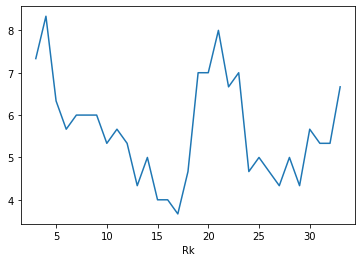

In [38]:
Player("Zack greinke").game_logs(2019).set_index("Rk").SO.rolling(3).mean().plot()

In [39]:
from sportsref.football import Player

im calling bref now


In [40]:
eli = Player("eli")

I'm 90% sure that you want Eli Manning


In [41]:
eli.overview("")

Available tables: ['passing', 'ks_passing_detailed_air_yards', 'ks_passing_detailed_accuracy', 'ks_passing_detailed_pressure', 'ks_passing_detailed_play_type', 'passing_playoffs', 'passing_advanced', 'rushing_and_receiving', 'detailed_rushing_and_receiving', 'rushing_and_receiving_playoffs', 'defense', 'defense_playoffs', 'scoring', 'snap_counts', 'sim_scores', 'fantasy', 'combine']


Exception: error with choice . valid choices are ['passing', 'ks_passing_detailed_air_yards', 'ks_passing_detailed_accuracy', 'ks_passing_detailed_pressure', 'ks_passing_detailed_play_type', 'passing_playoffs', 'passing_advanced', 'rushing_and_receiving', 'detailed_rushing_and_receiving', 'rushing_and_receiving_playoffs', 'defense', 'defense_playoffs', 'scoring', 'snap_counts', 'sim_scores', None, 'fantasy', 'combine']

In [ ]:
tbls = ['passing', 'ks_passing_detailed_air_yards', 'ks_passing_detailed_accuracy', 'ks_passing_detailed_pressure', 'ks_passing_detailed_play_type', 'passing_playoffs', 'passing_advanced', 'rushing_and_receiving', 'detailed_rushing_and_receiving', 'rushing_and_receiving_playoffs', 'defense', 'defense_playoffs', 'scoring', 'snap_counts', 'sim_scores', 'fantasy', 'combine']

In [ ]:
for tbl in tbls:
    print(tbl)
    display(eli.overview(tbl))